In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",None)

# EDA

In [113]:
dataset=pd.read_csv('sales.csv')


In [114]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [115]:
dataset.shape

(1460, 81)

In [116]:
dataset['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [117]:
dataset.duplicated().sum()

0

In [118]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [119]:
for feature in dataset.columns:
    if dataset[feature].isnull().sum()>0:
        print(feature)
        r=dataset[feature].isnull().sum()
        print(r)
    


LotFrontage
259
Alley
1369
MasVnrType
8
MasVnrArea
8
BsmtQual
37
BsmtCond
37
BsmtExposure
38
BsmtFinType1
37
BsmtFinType2
38
Electrical
1
FireplaceQu
690
GarageType
81
GarageYrBlt
81
GarageFinish
81
GarageQual
81
GarageCond
81
PoolQC
1453
Fence
1179
MiscFeature
1406


In [120]:
features_with_null=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [121]:
for features in features_with_null:
    print(features,np.round(dataset[features].isnull().mean(),4),"%missing values")

LotFrontage 0.1774 %missing values
Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
Electrical 0.0007 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


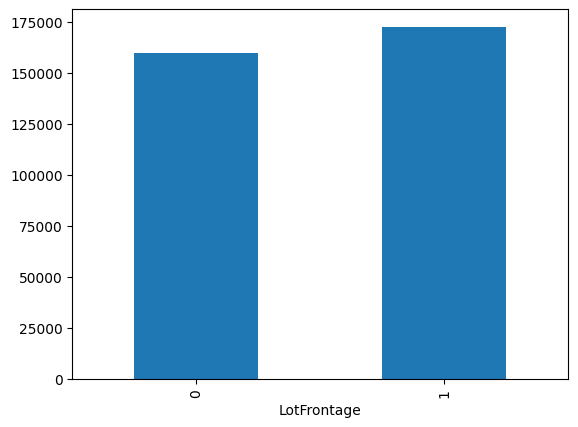

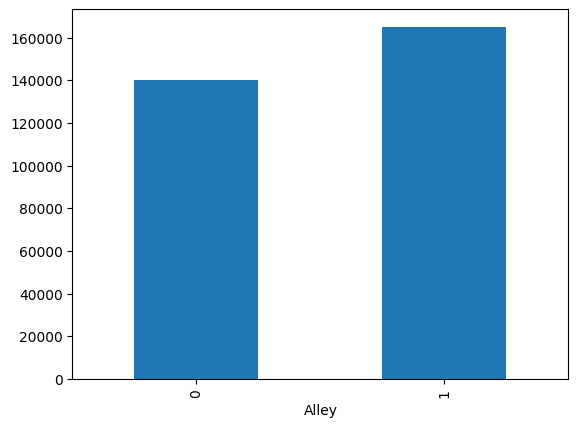

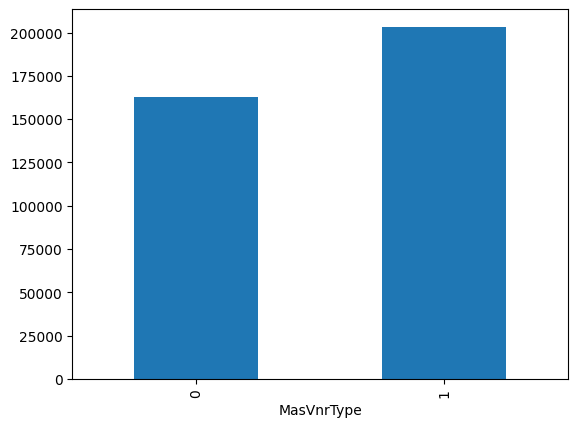

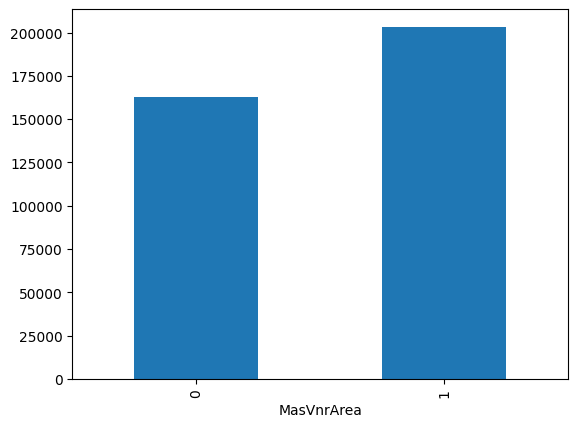

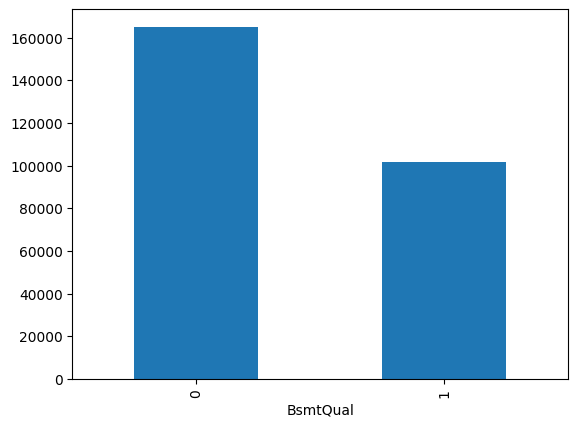

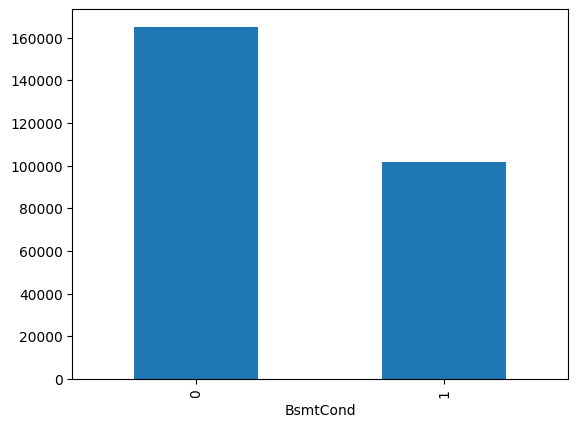

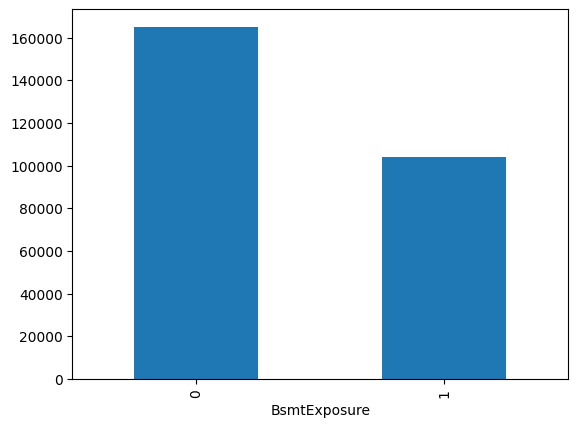

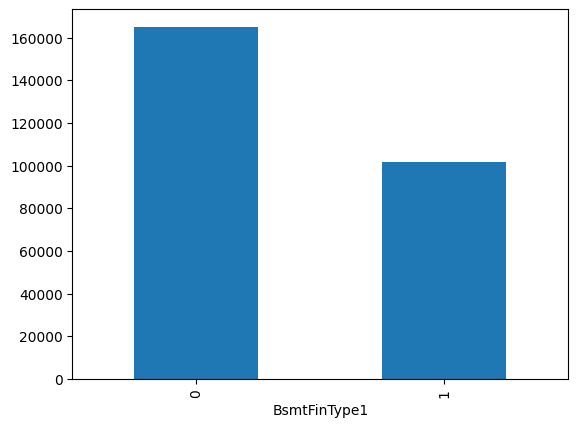

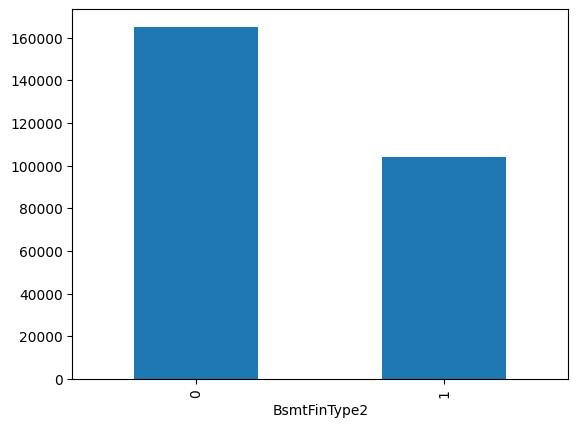

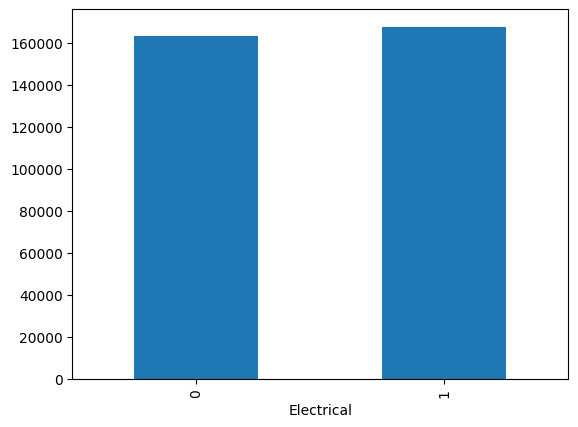

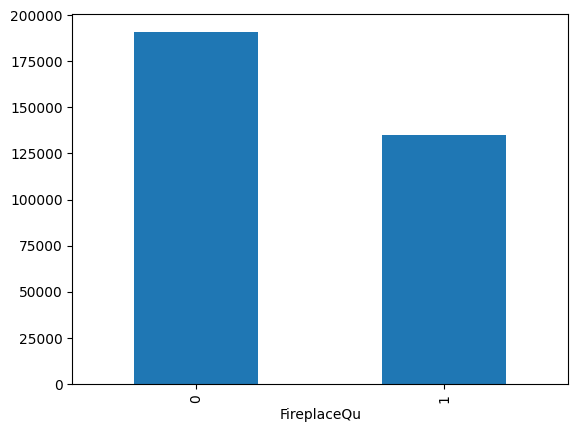

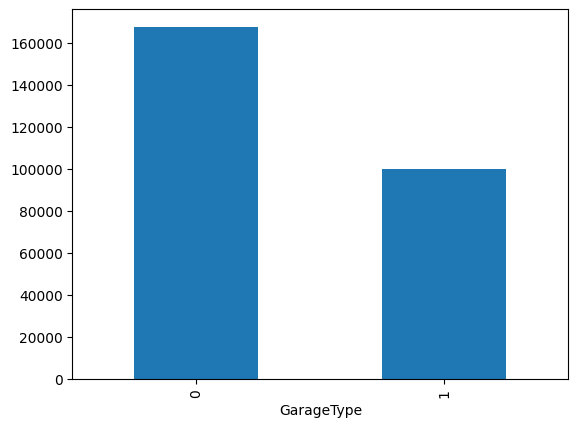

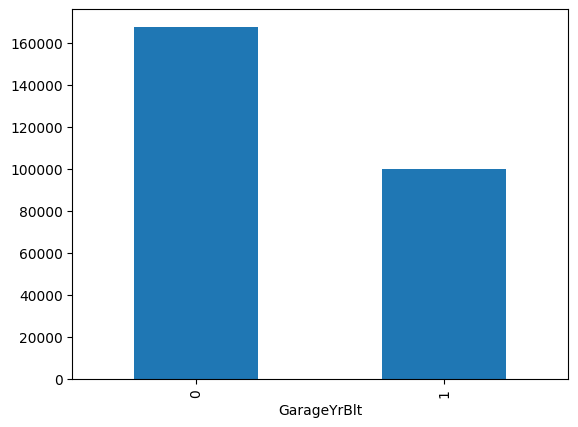

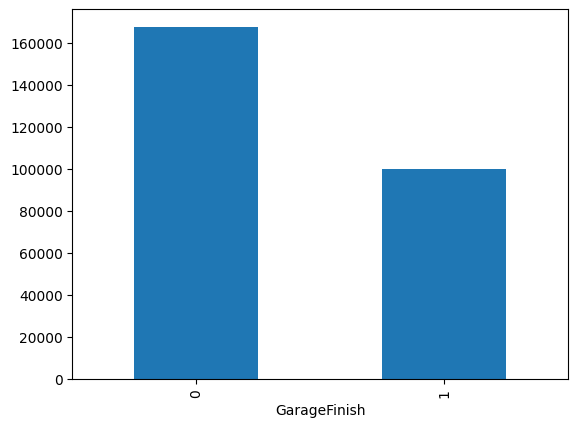

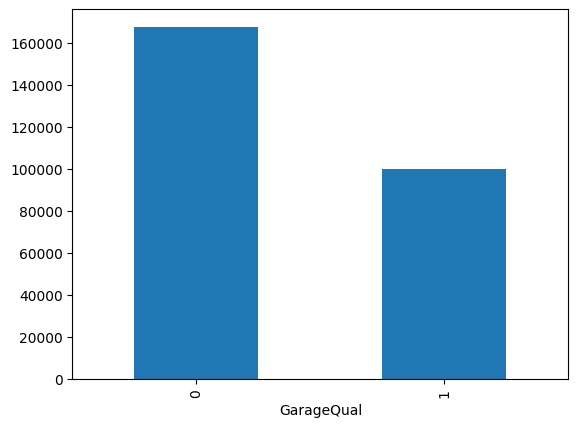

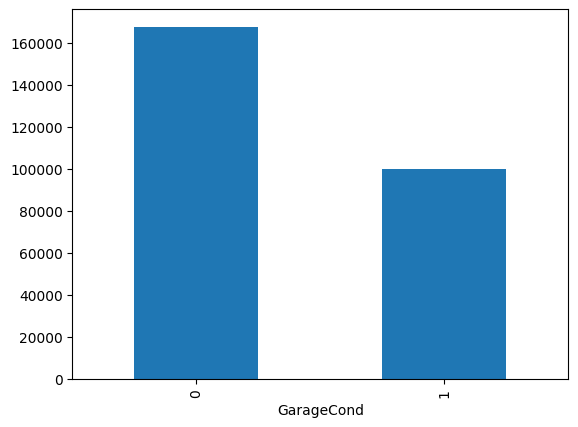

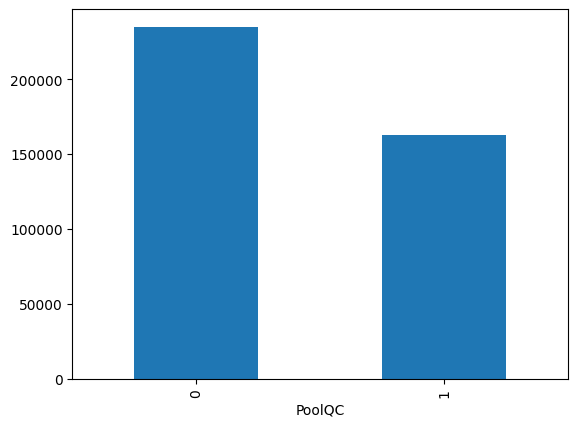

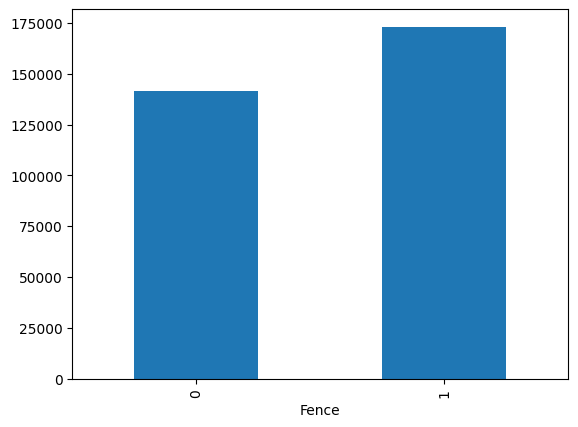

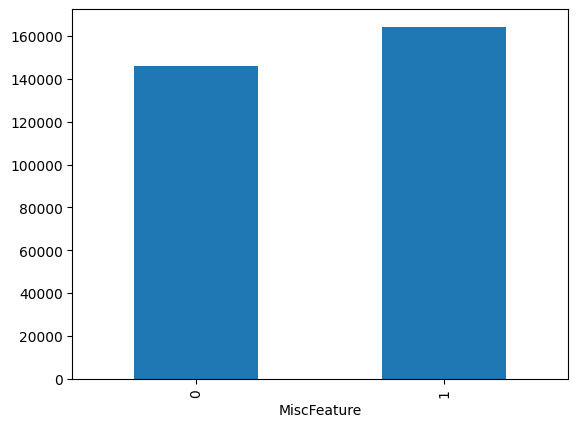

In [122]:
for feature in features_with_null:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

In [123]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]

In [124]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [125]:
dataset[numerical_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [126]:
year_feature=[feature for feature in numerical_features if "Yr" in feature or "Year" in feature]

In [127]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [128]:
for feature in year_feature:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House price vs year sold')

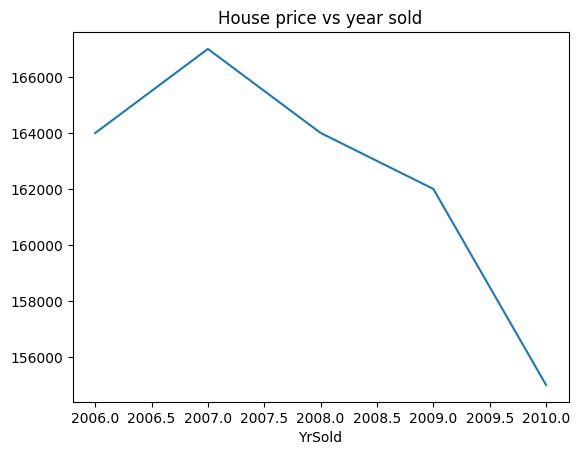

In [129]:
dataset.groupby("YrSold")["SalePrice"].median().plot()
plt.title("House price vs year sold")

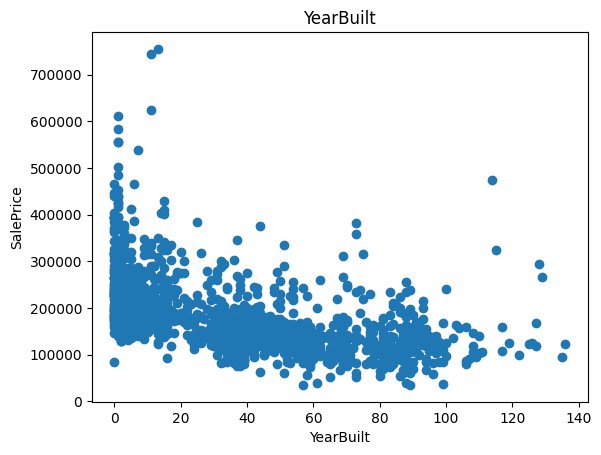

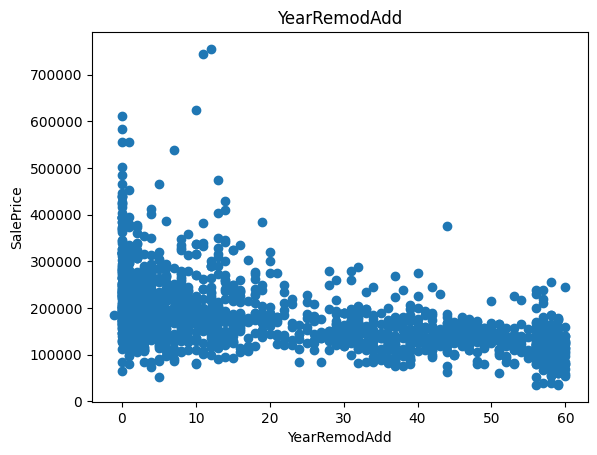

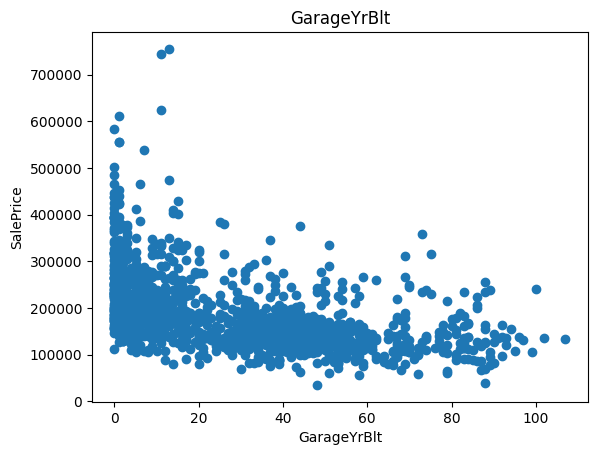

In [130]:
for feature in year_feature:
    if feature!="YrSold":
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

In [131]:
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature]

In [132]:
len(discrete_features)

17

In [133]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [134]:
dataset[discrete_features]

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0             60            7            5             0             1   
1             20            6            8             0             0   
2             60            7            5             0             1   
3             70            7            5             0             1   
4             60            8            5             0             1   
...          ...          ...          ...           ...           ...   
1455          60            6            5             0             0   
1456          20            6            6             0             1   
1457          70            7            9             0             0   
1458          20            5            6             0             1   
1459          20            5            6             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  \
0                8           0           2          0         0        0   
1                6           1           2          0         0        0   
2                6           1           2          0         0        0   
3                7           1           3          0         0        0   
4                9           1           3          0         0        0   
...            ...         ...         ...        ...       ...      ...   
1455             7           1           2          0         0        0   
1456             7           2           2          0         0        0   
1457             9           2           1          0         0     2500   
1458             5           0           1          0         0        0   
1459             6           0           1          0         0        0   

      MoSold  
0          2  
1          5  
2          9  
3          2  
4         12  
...      ...  
1455       8  
1456       2  
1457       5  
1458       4  
1459       6  

[1460 rows x 17 columns]

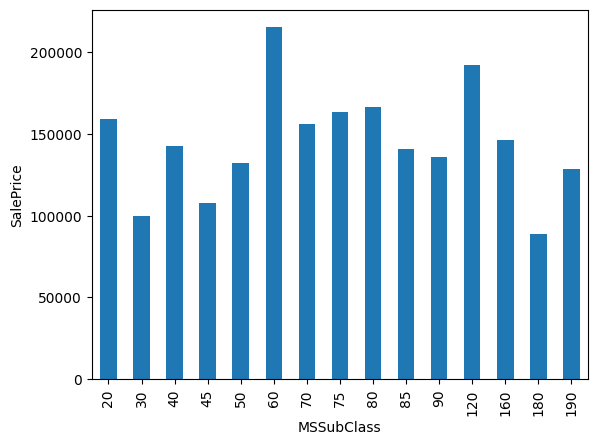

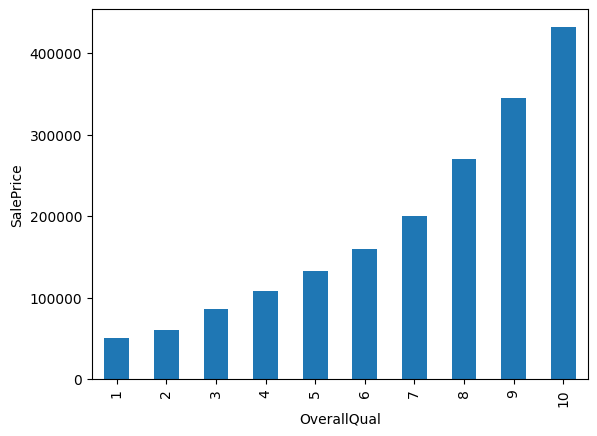

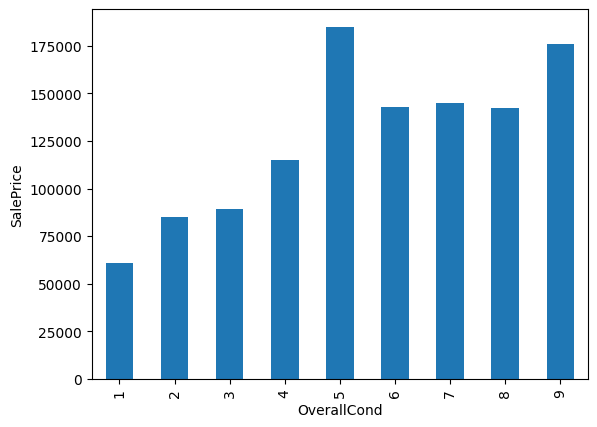

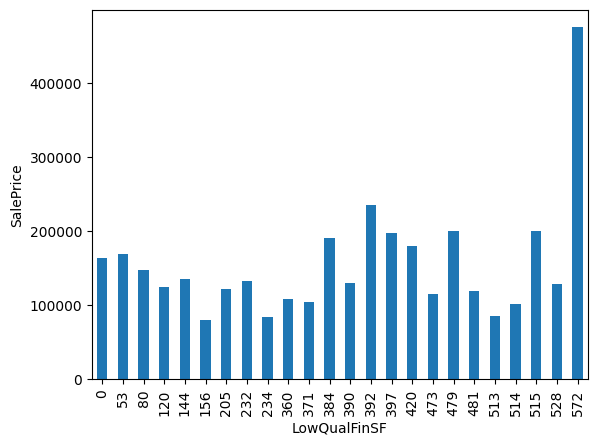

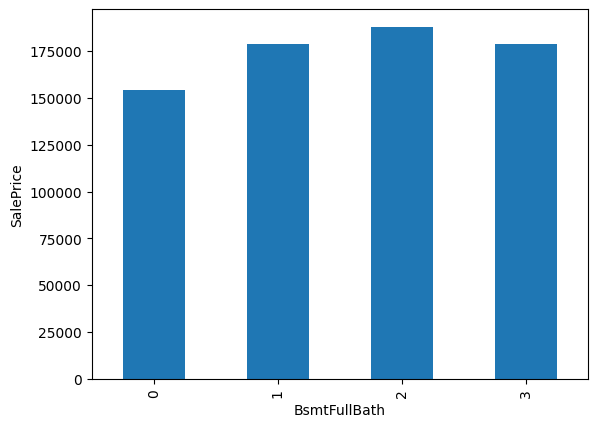

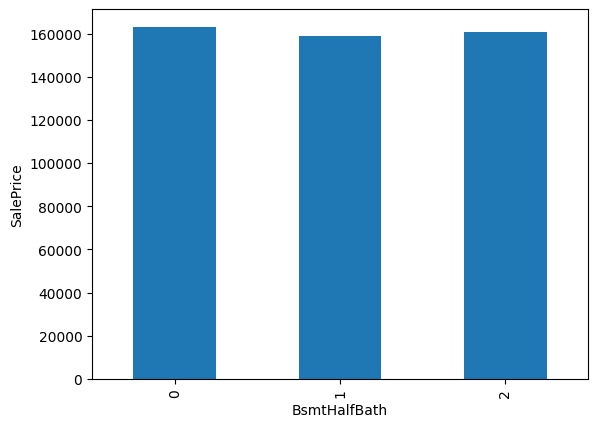

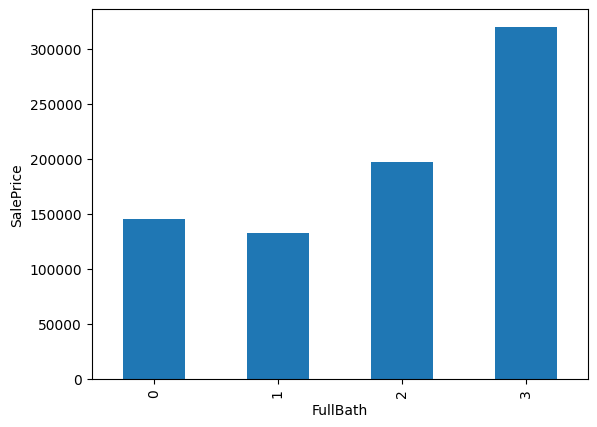

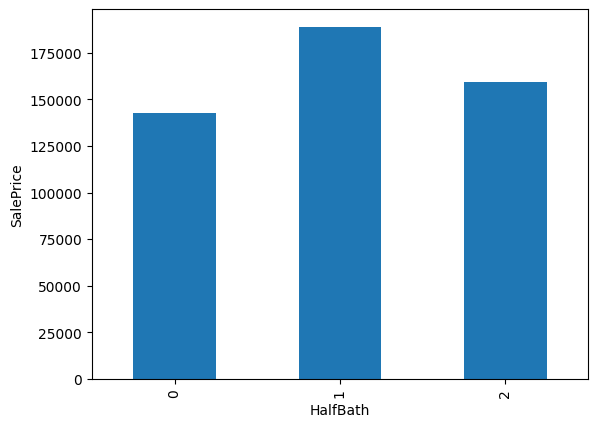

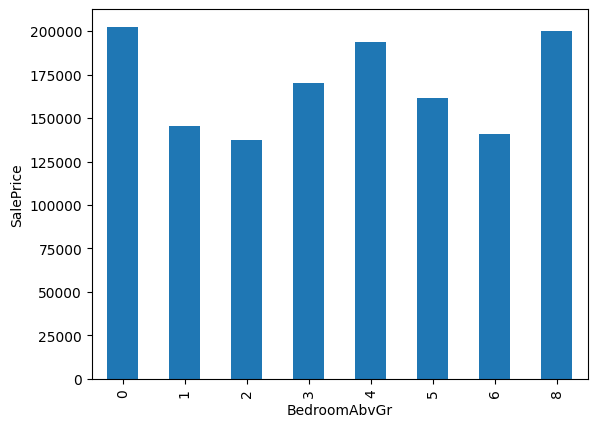

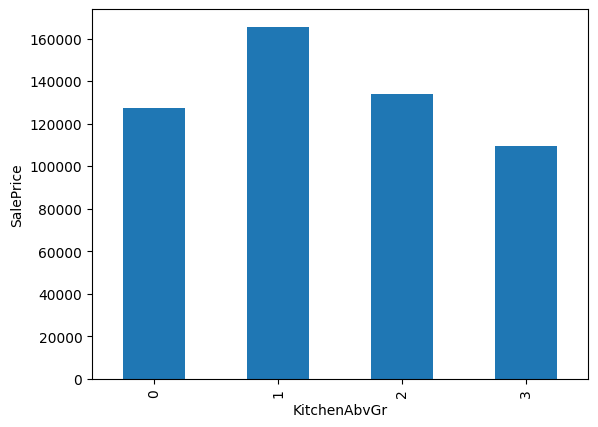

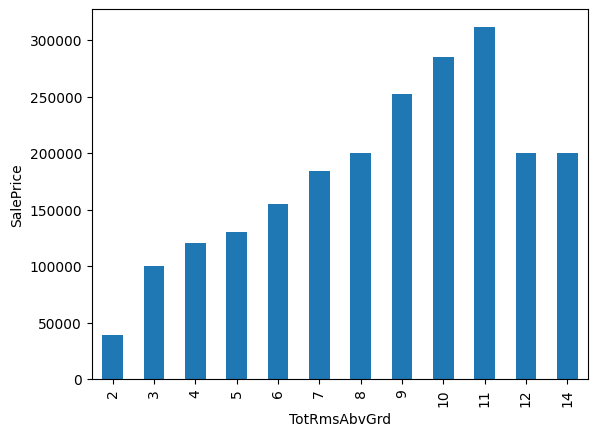

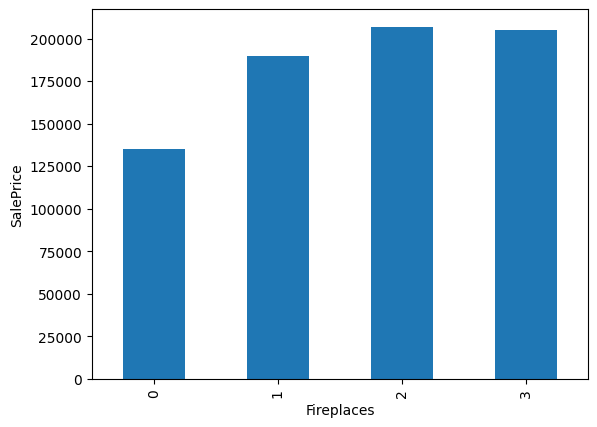

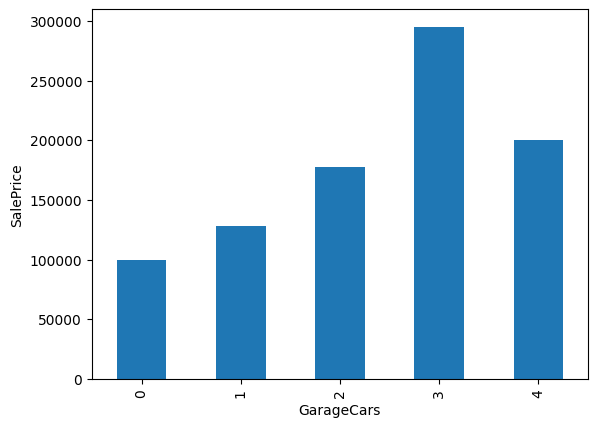

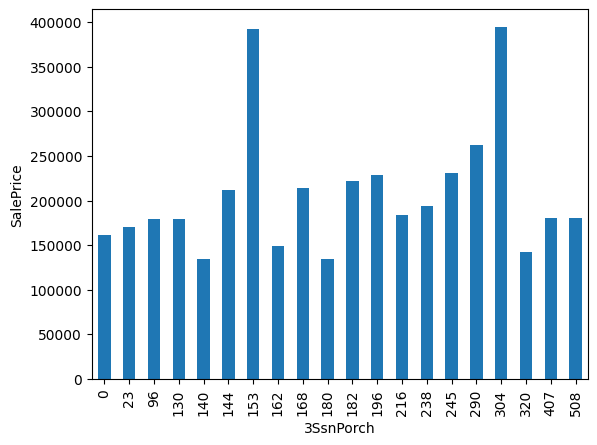

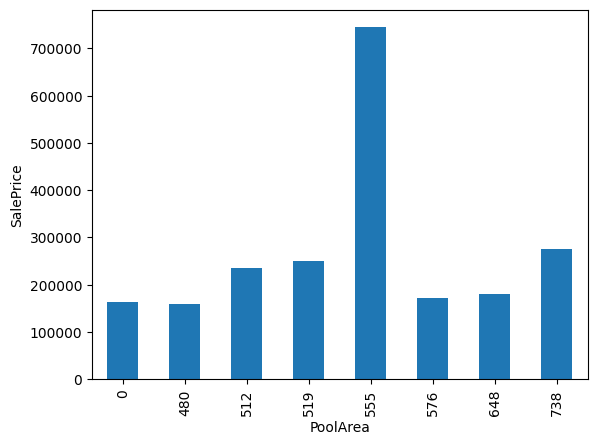

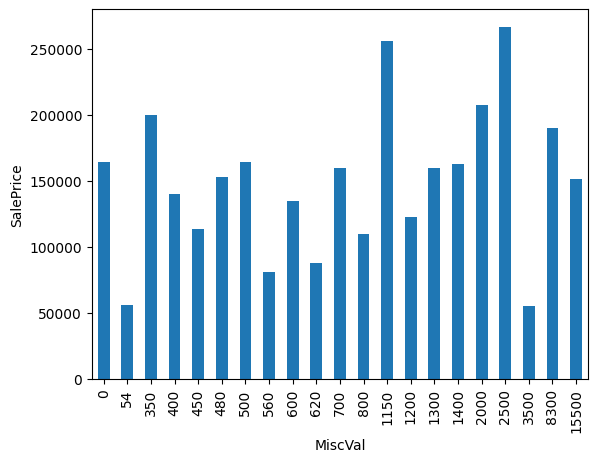

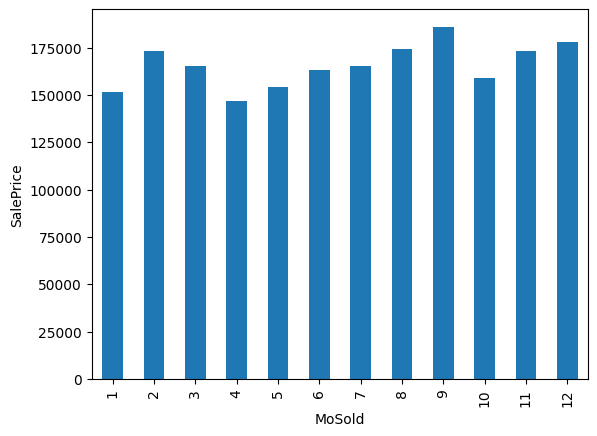

In [135]:
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [136]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features]
continous_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice']

In [137]:
len(continous_features)

21

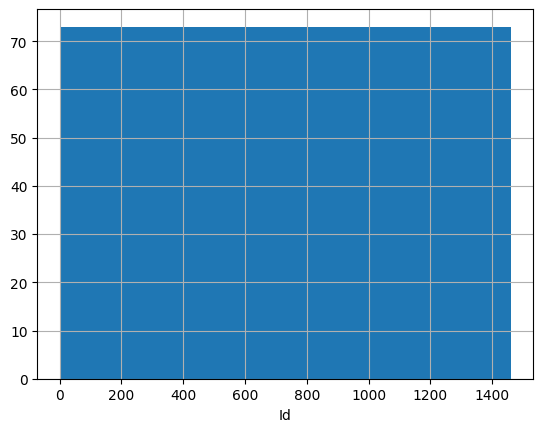

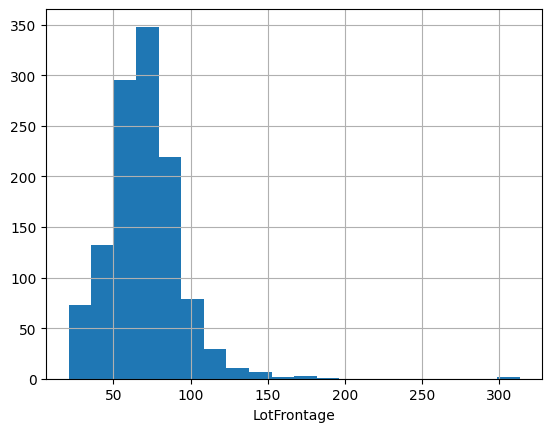

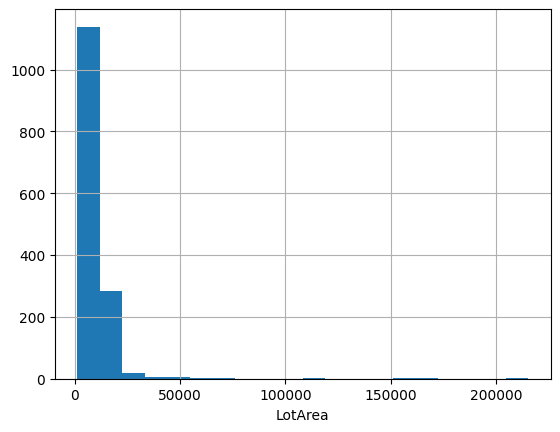

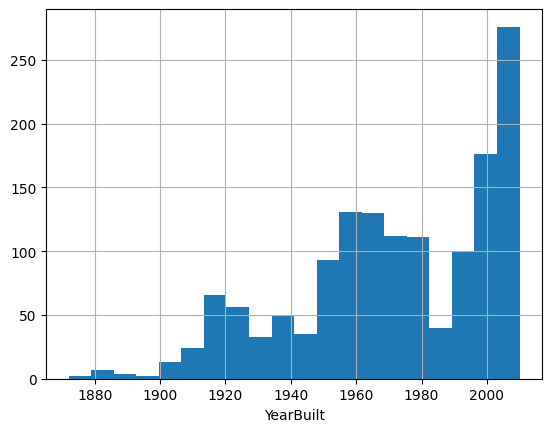

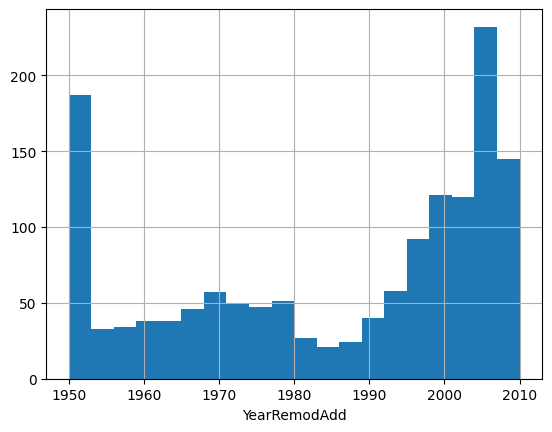

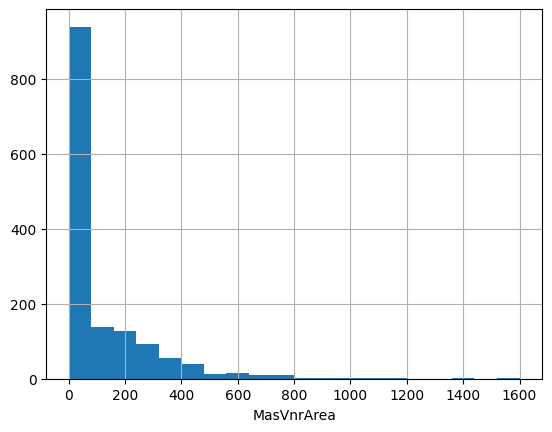

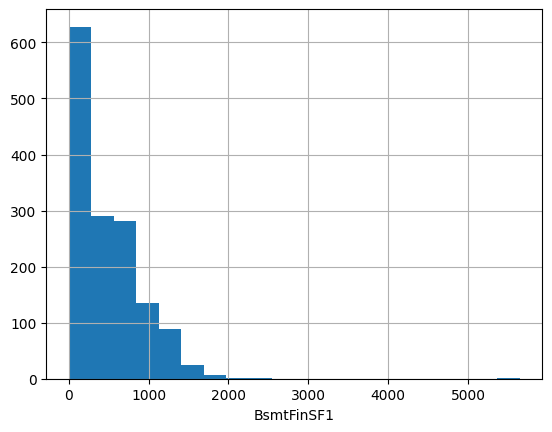

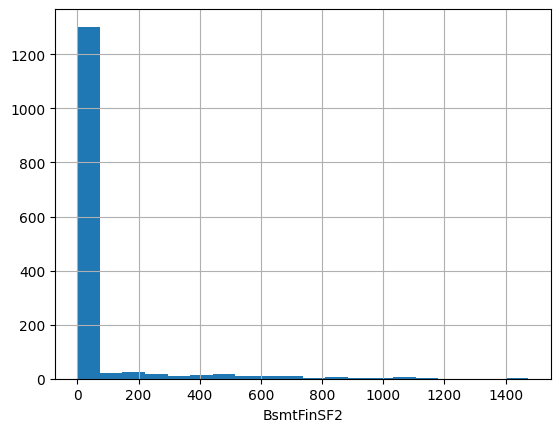

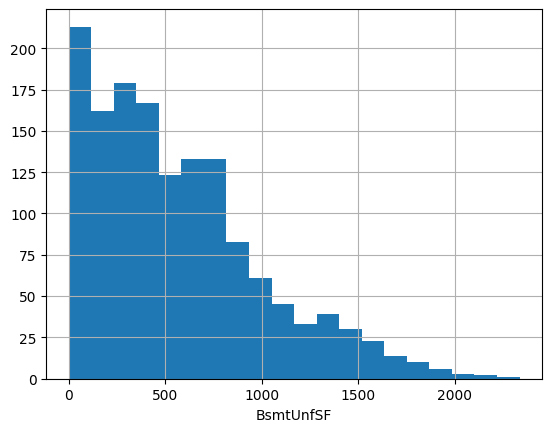

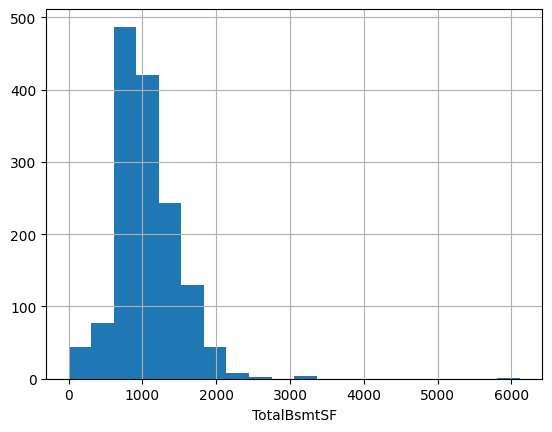

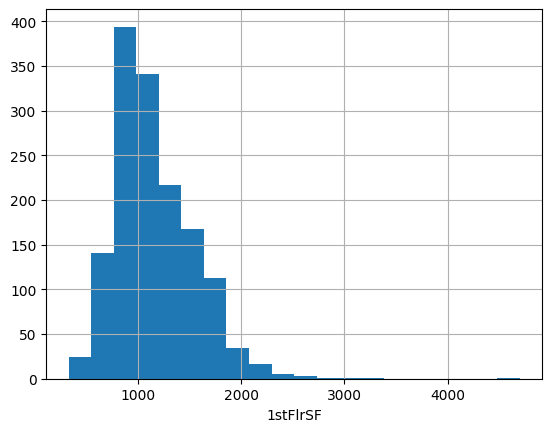

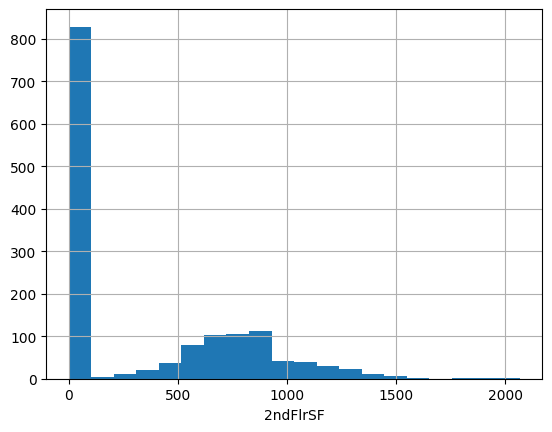

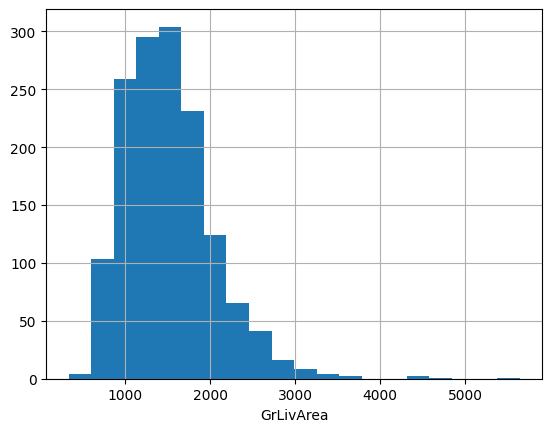

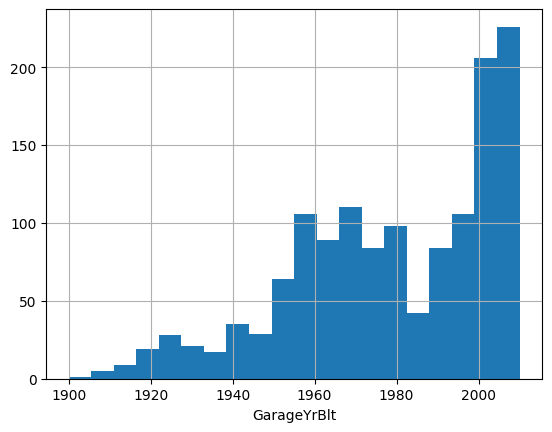

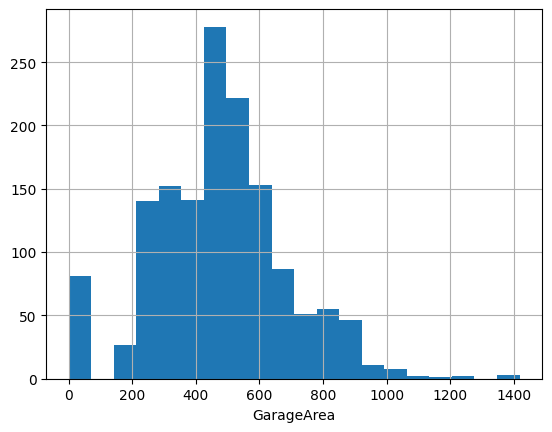

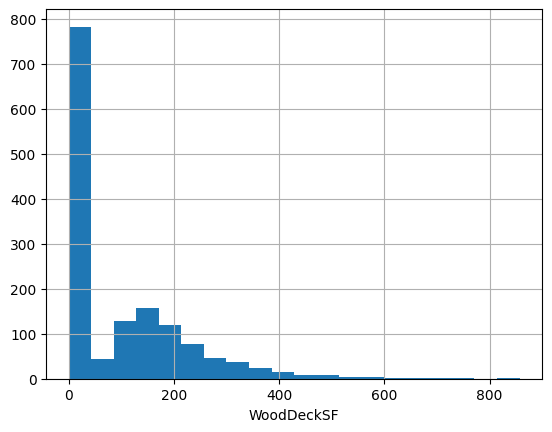

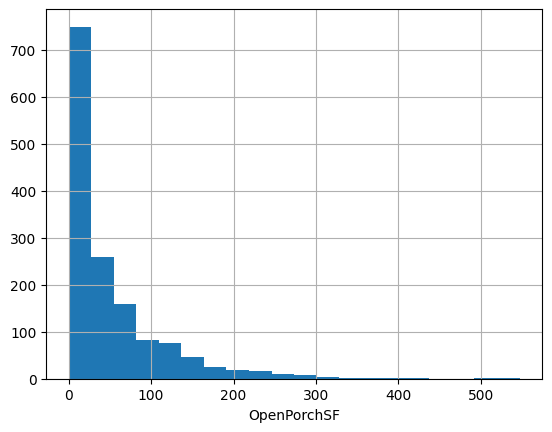

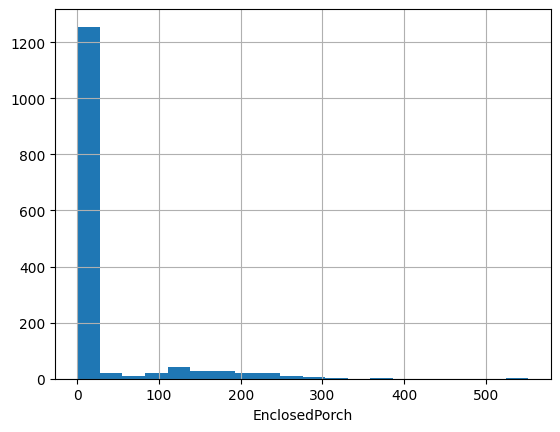

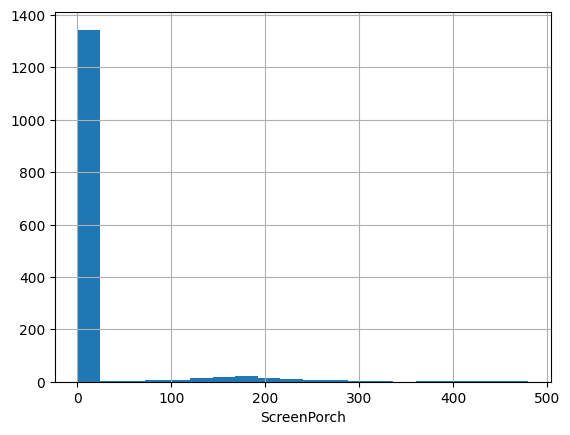

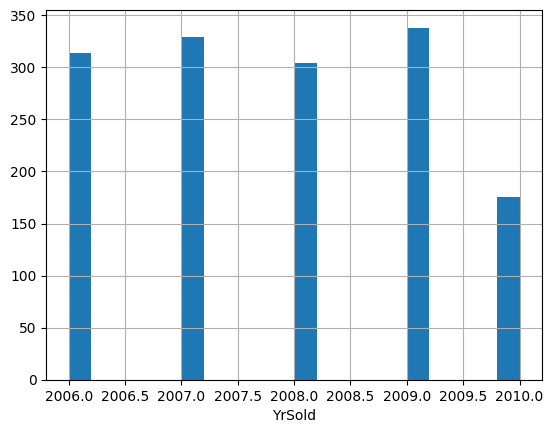

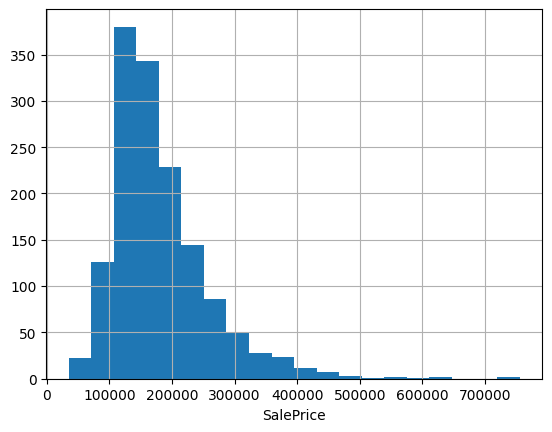

In [138]:
for feature in continous_features:
    data=dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.show()

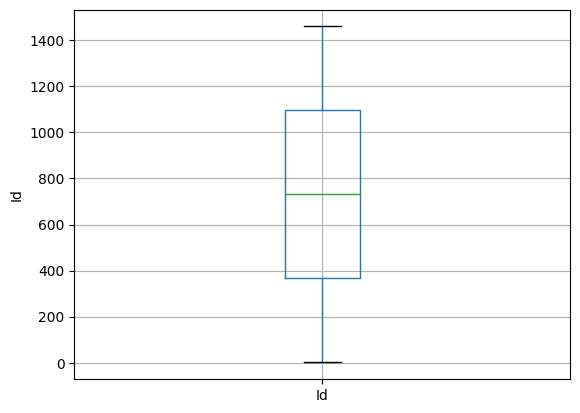

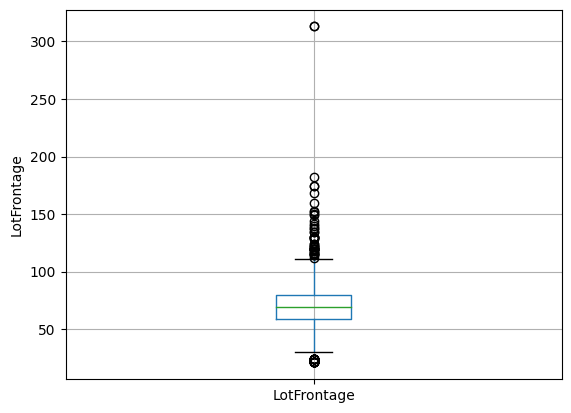

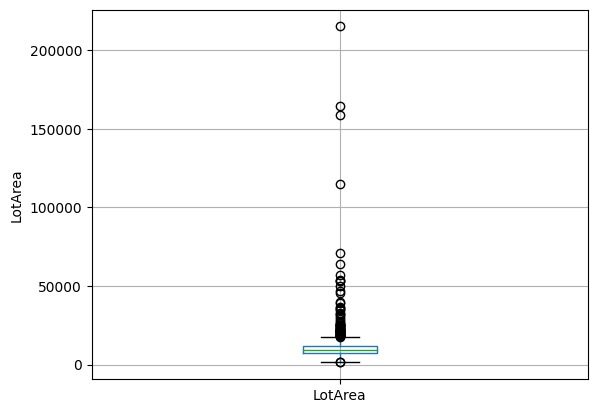

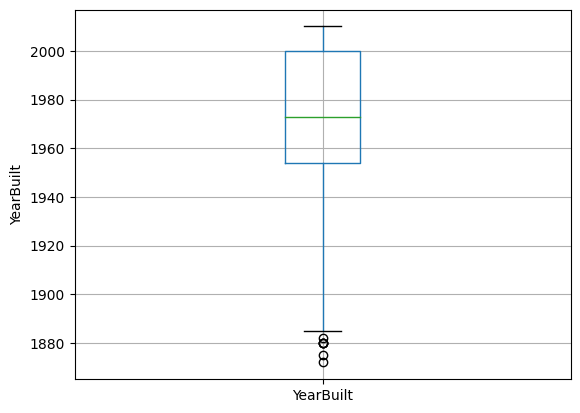

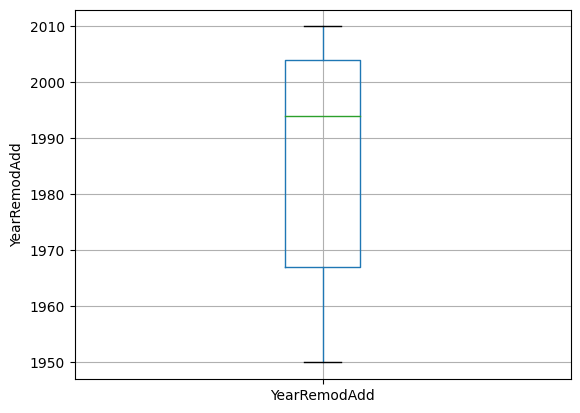

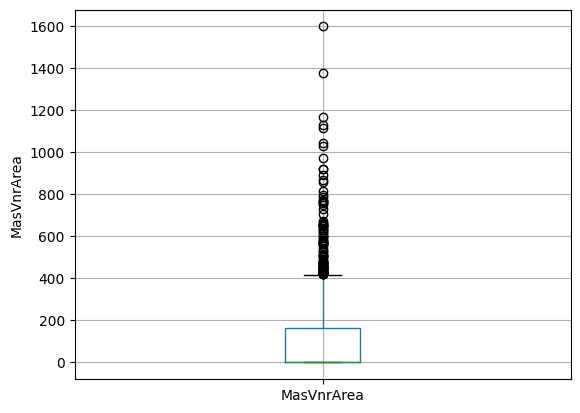

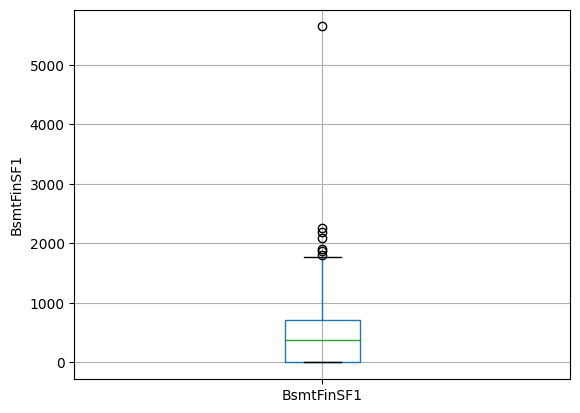

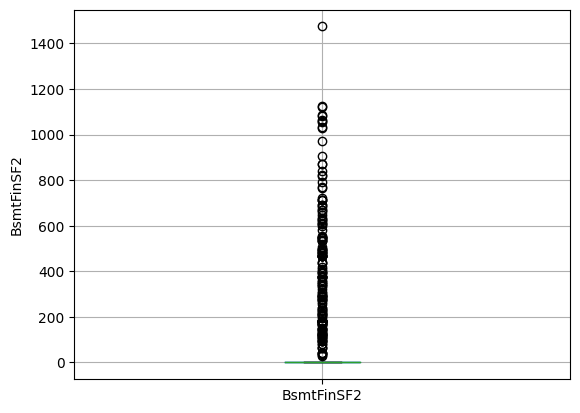

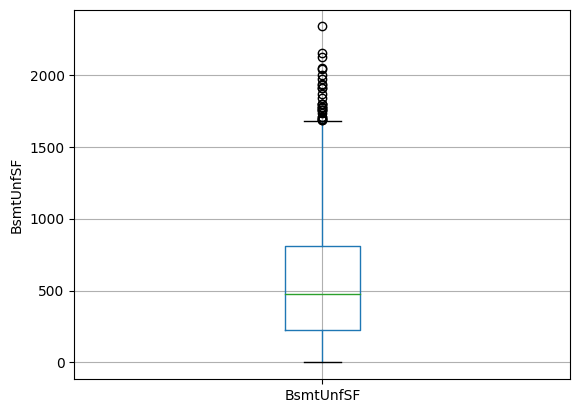

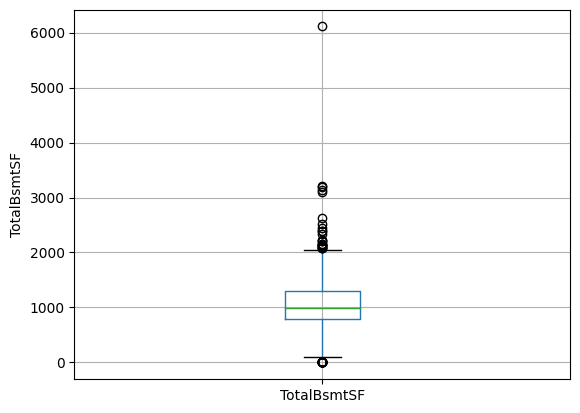

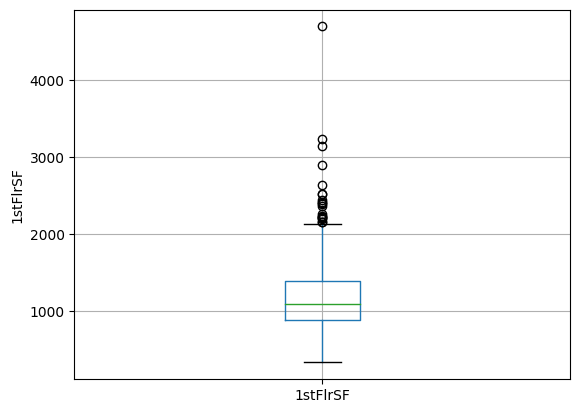

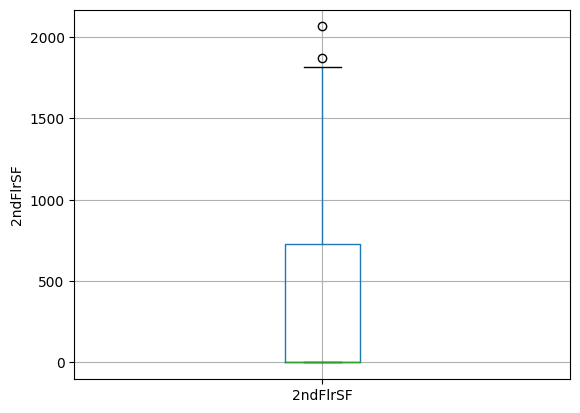

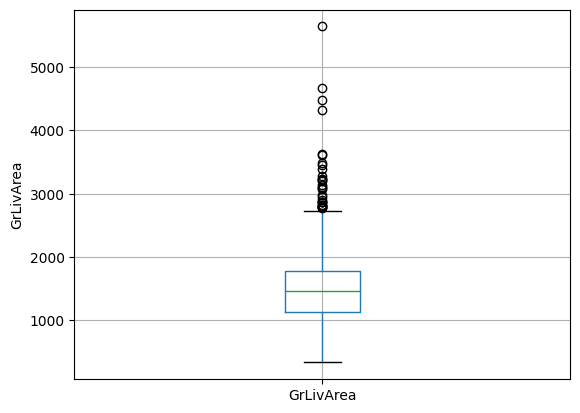

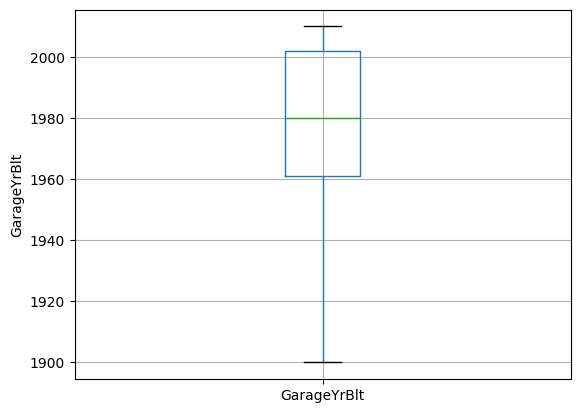

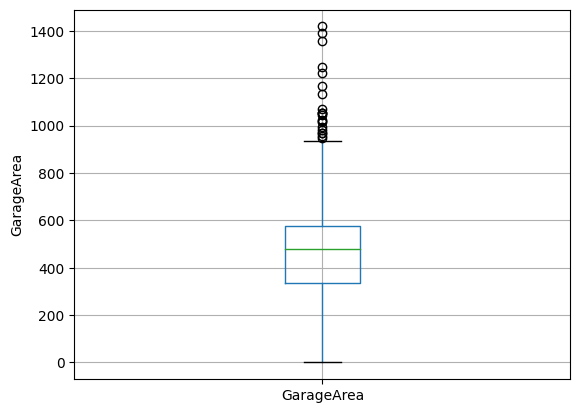

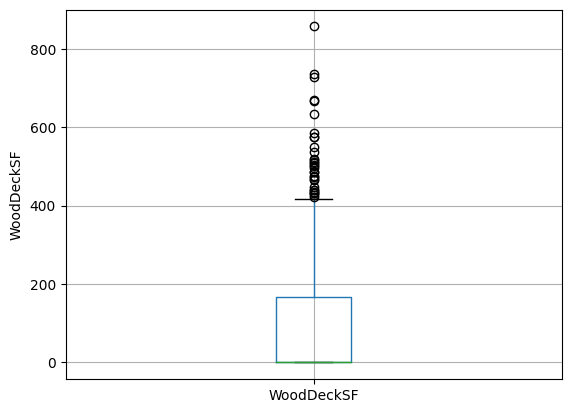

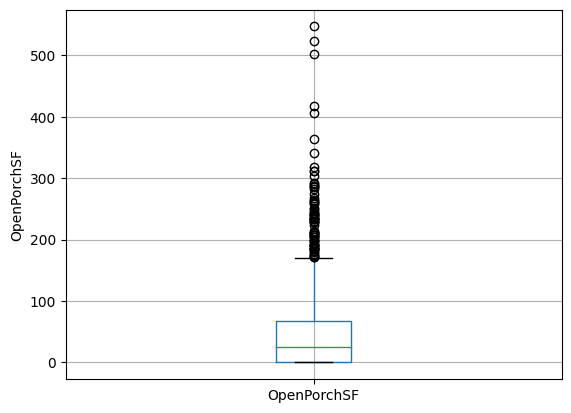

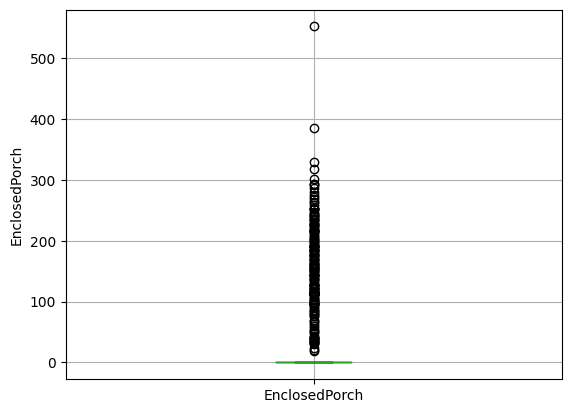

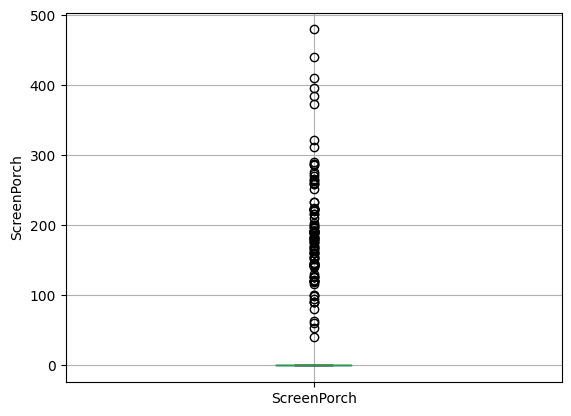

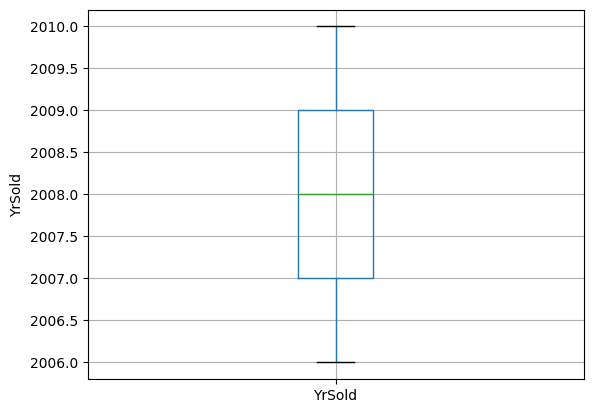

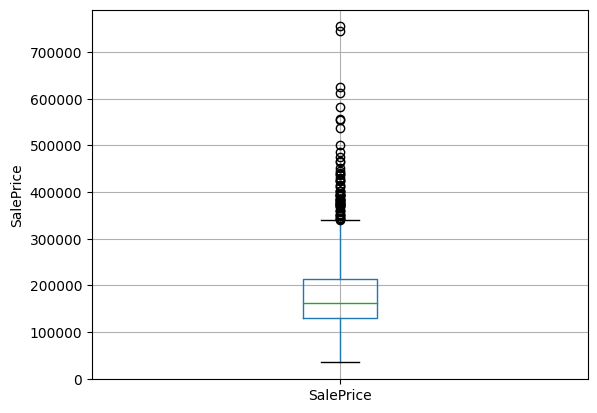

In [139]:
for feature in continous_features:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()
    

In [140]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [141]:
dataset[categorical_features]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [142]:
for feature in categorical_features:
    print(feature,dataset[feature].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [143]:
len(categorical_features)

43

In [144]:
for feature in categorical_features:
    print('The feature is {} and number of categories {}'.format(feature,dataset[feature].nunique()))

The feature is MSZoning and number of categories 5
The feature is Street and number of categories 2
The feature is Alley and number of categories 2
The feature is LotShape and number of categories 4
The feature is LandContour and number of categories 4
The feature is Utilities and number of categories 2
The feature is LotConfig and number of categories 5
The feature is LandSlope and number of categories 3
The feature is Neighborhood and number of categories 25
The feature is Condition1 and number of categories 9
The feature is Condition2 and number of categories 8
The feature is BldgType and number of categories 5
The feature is HouseStyle and number of categories 8
The feature is RoofStyle and number of categories 6
The feature is RoofMatl and number of categories 8
The feature is Exterior1st and number of categories 15
The feature is Exterior2nd and number of categories 16
The feature is MasVnrType and number of categories 4
The feature is ExterQual and number of categories 4
The fea

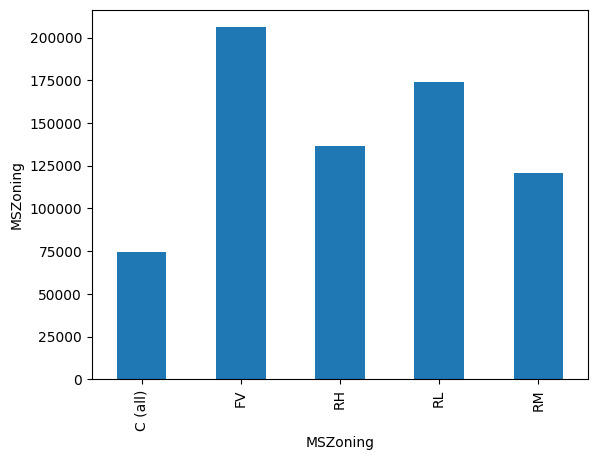

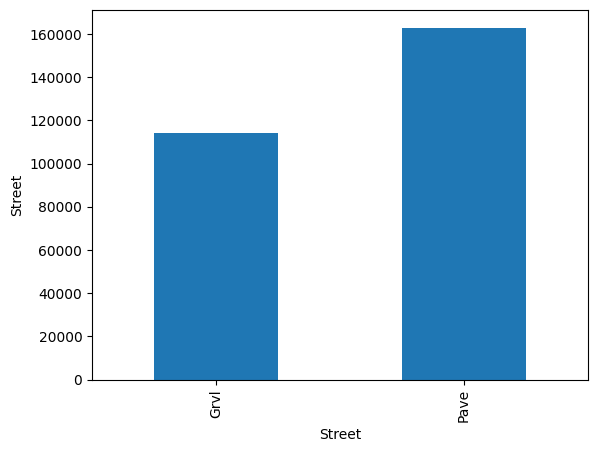

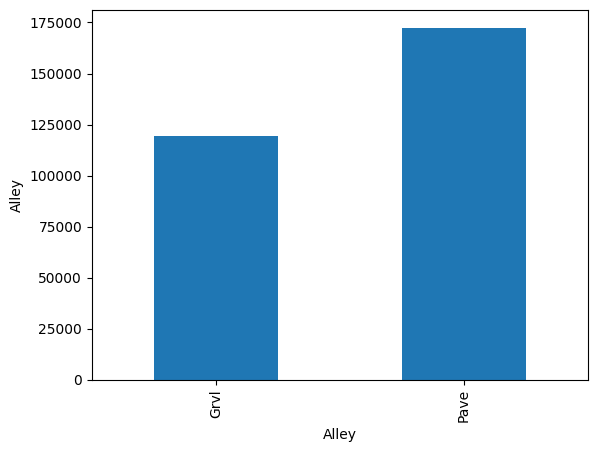

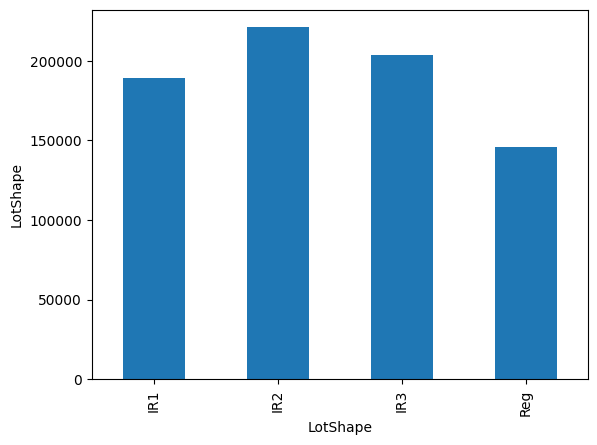

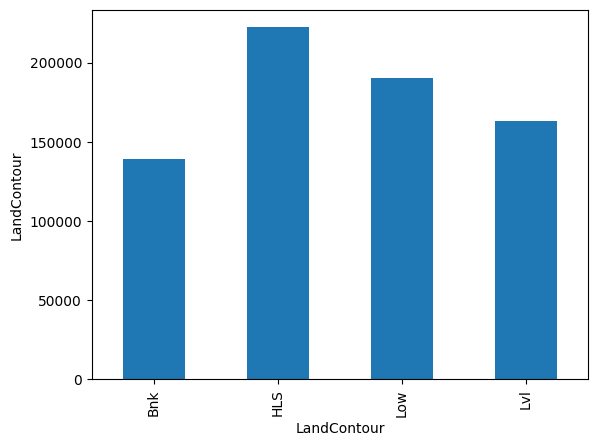

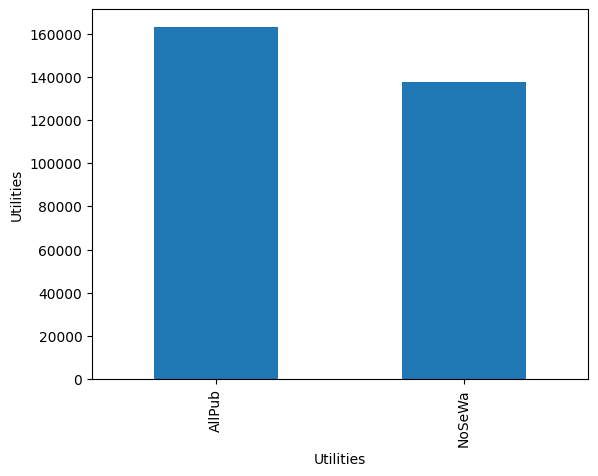

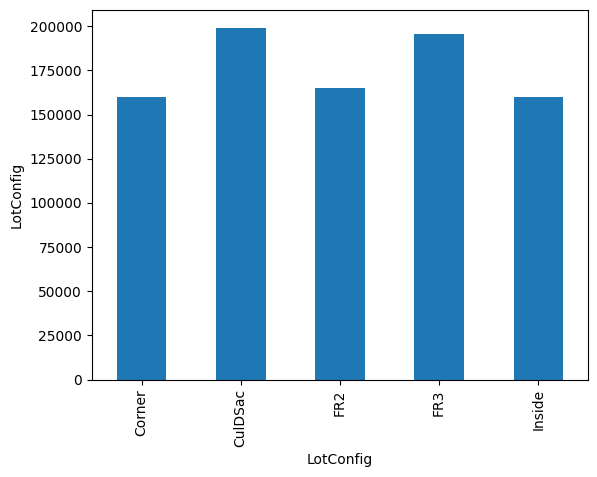

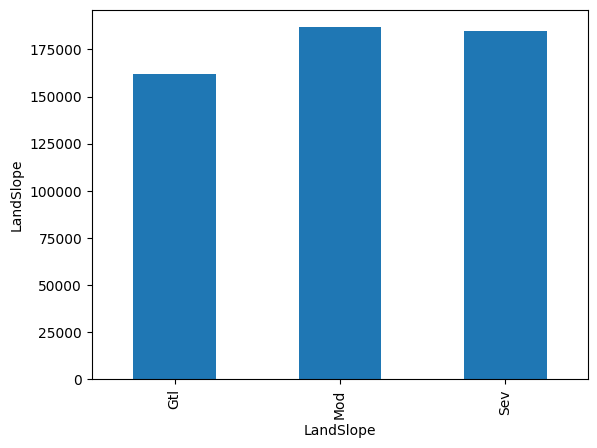

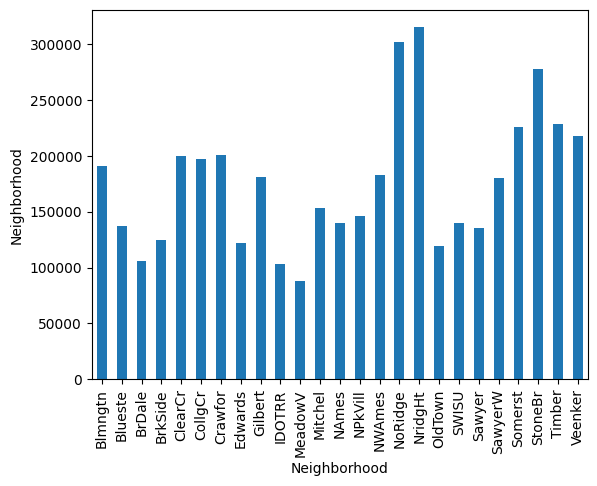

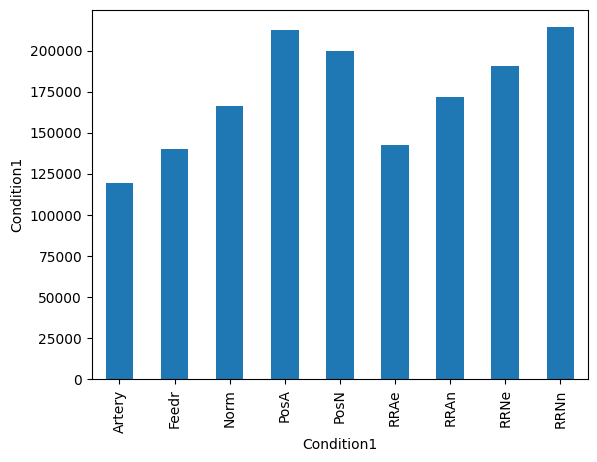

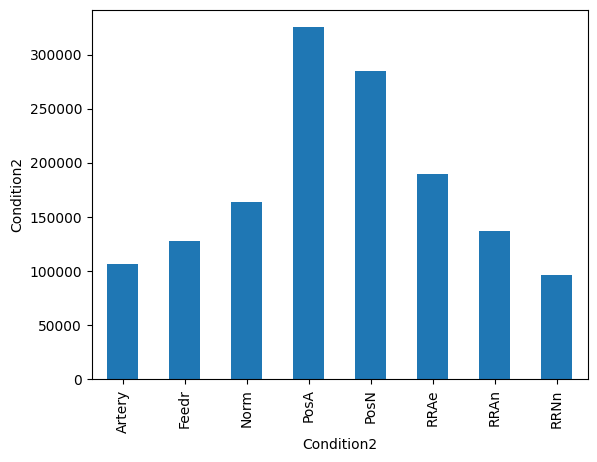

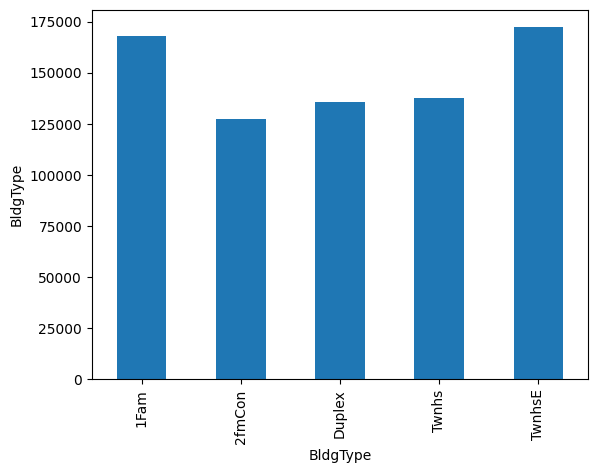

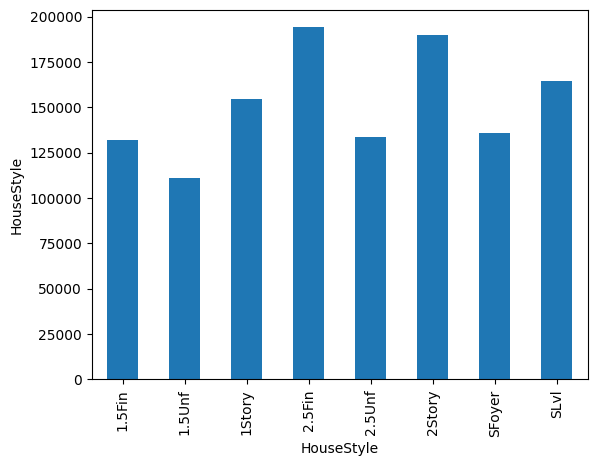

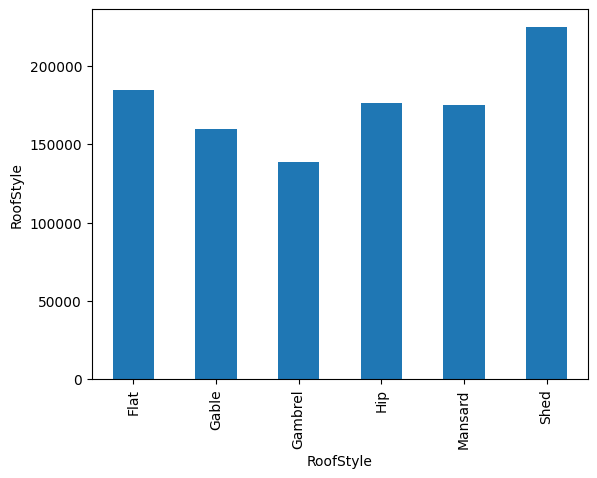

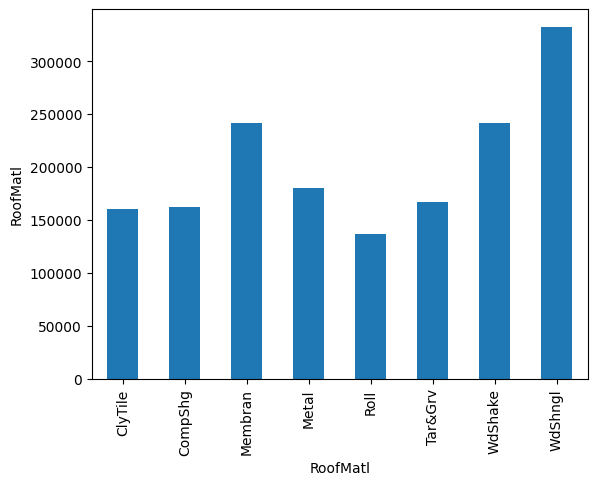

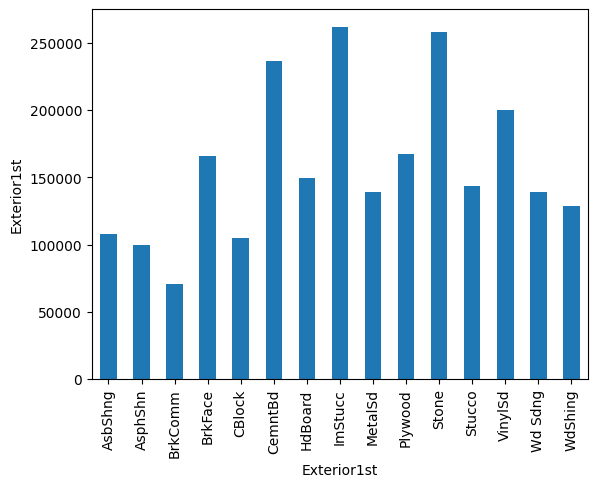

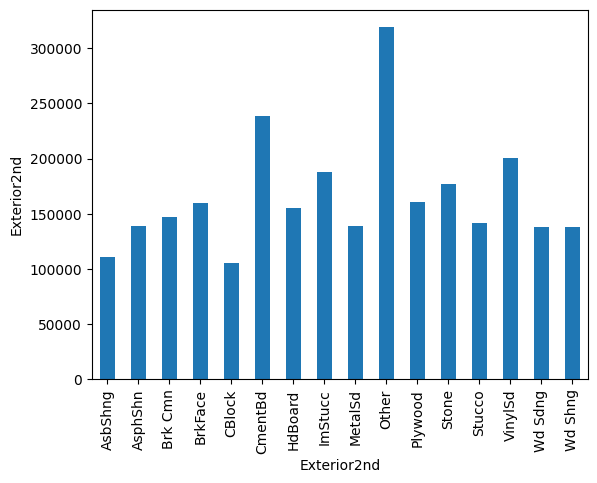

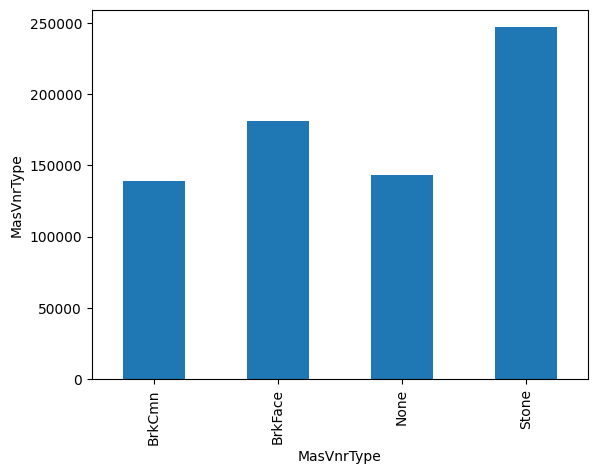

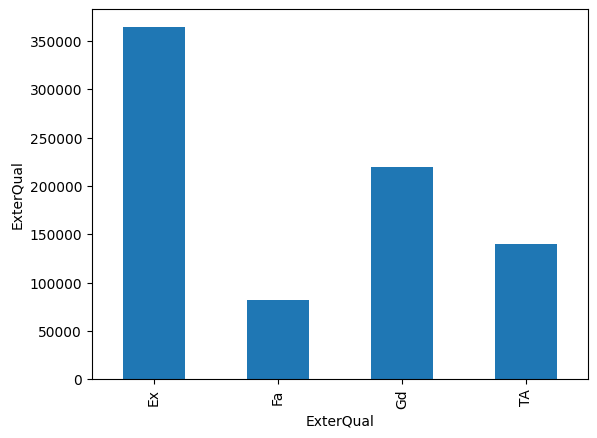

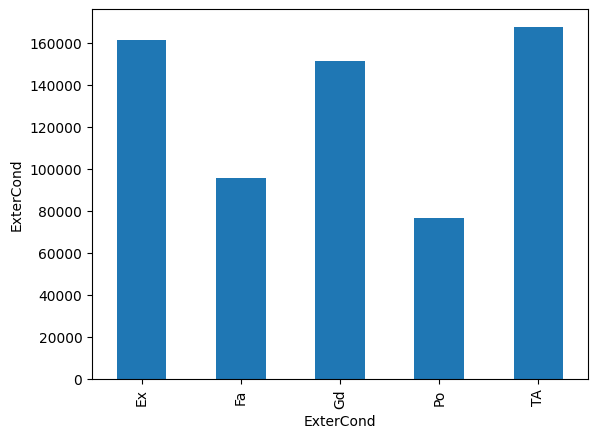

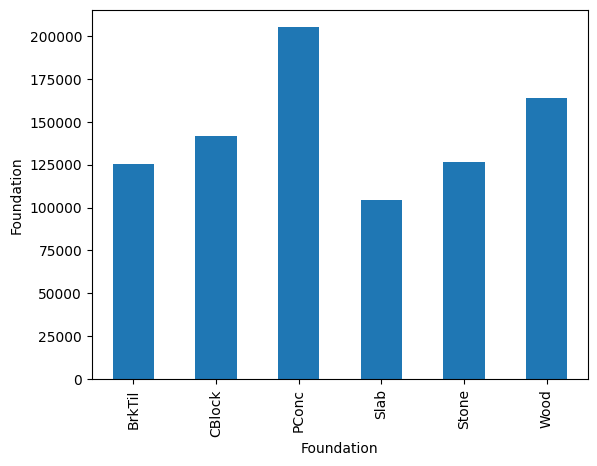

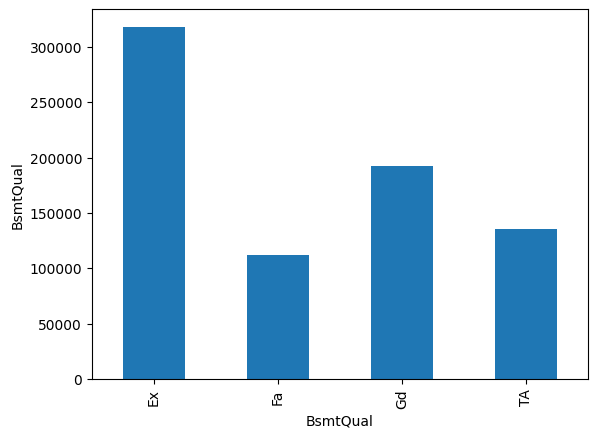

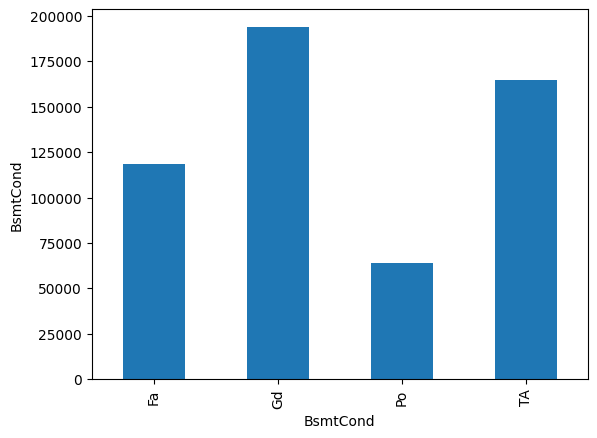

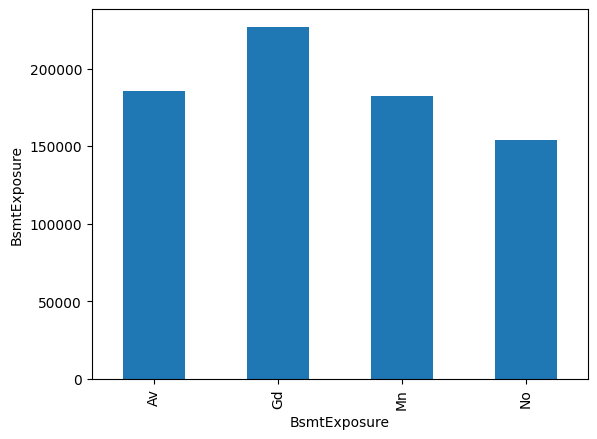

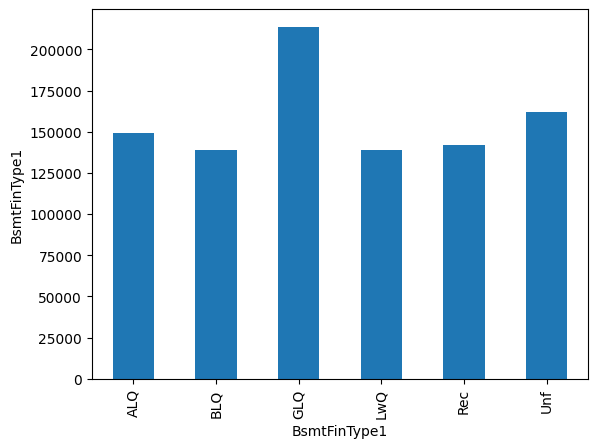

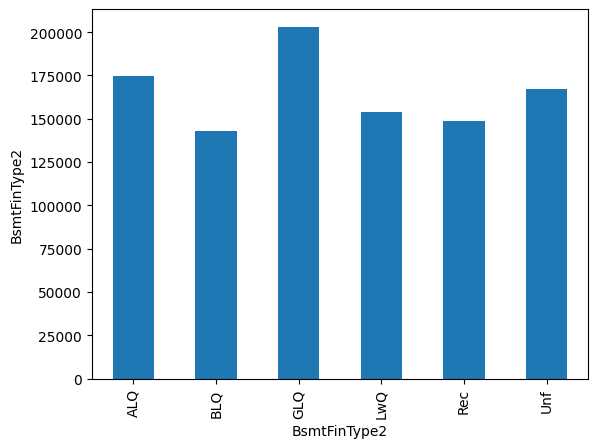

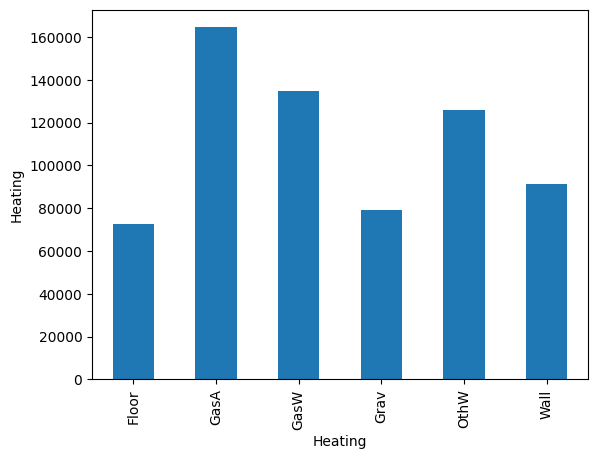

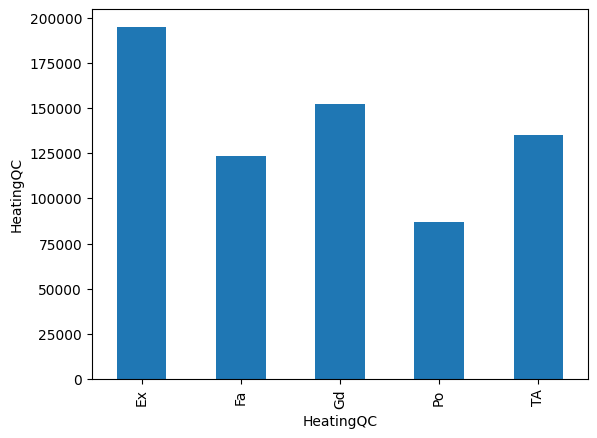

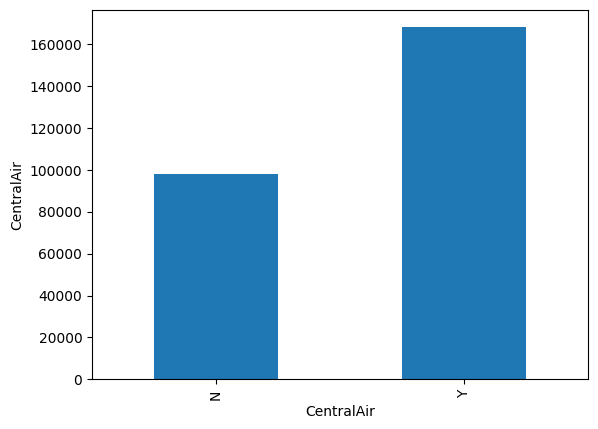

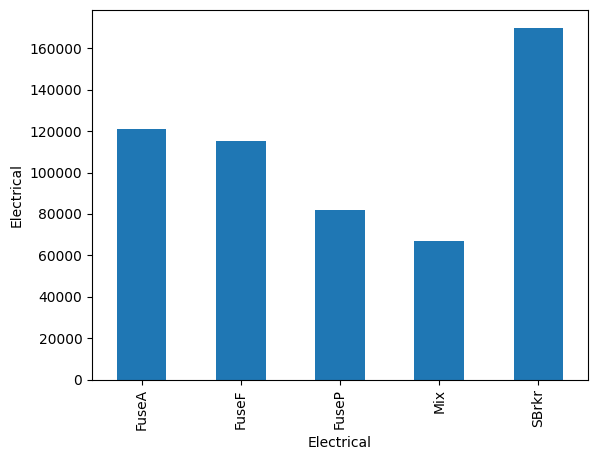

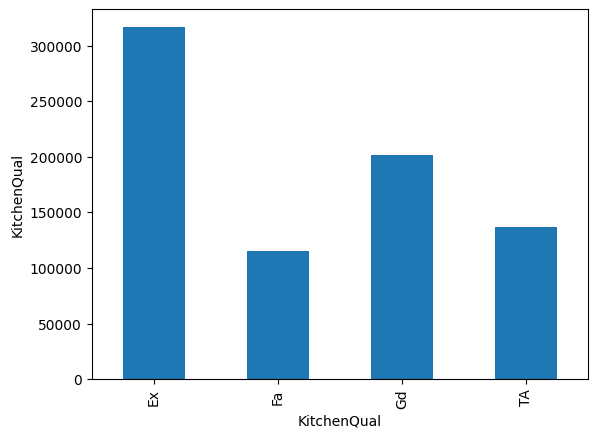

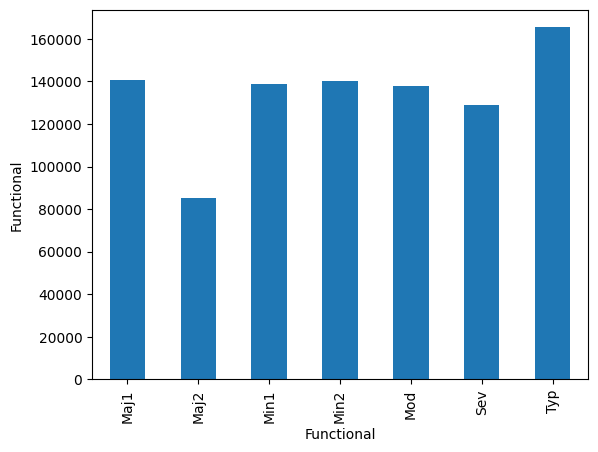

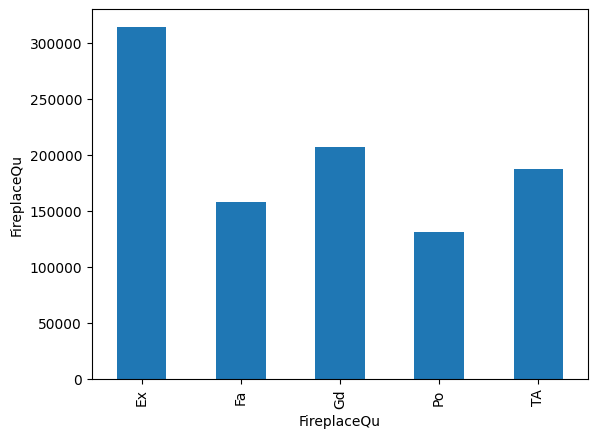

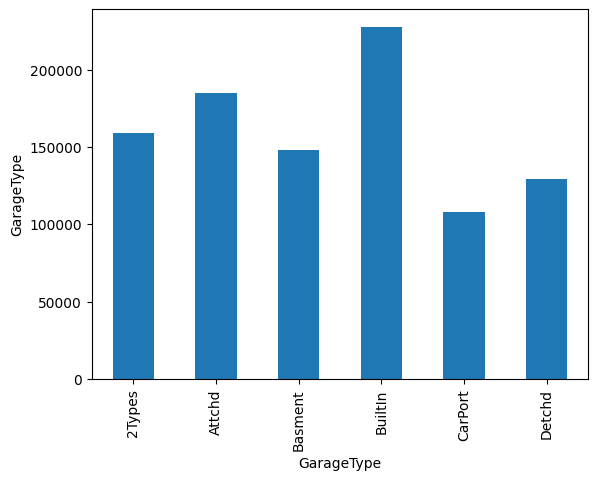

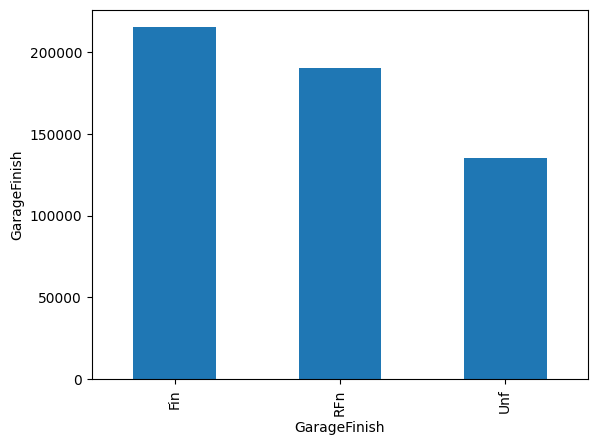

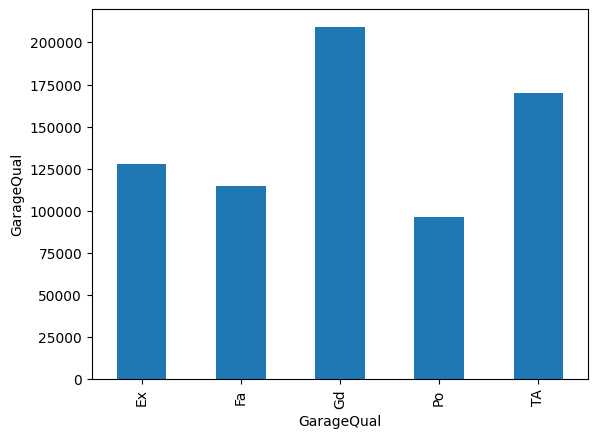

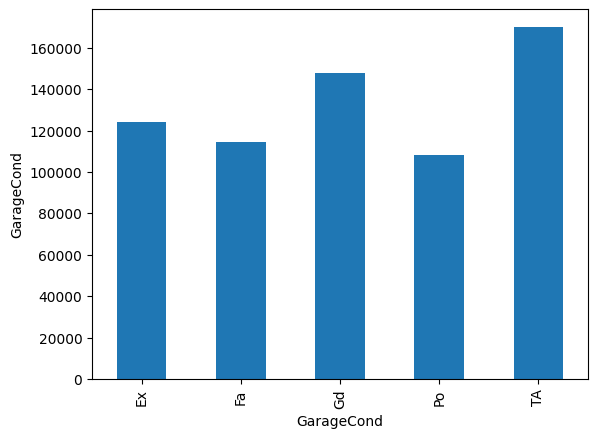

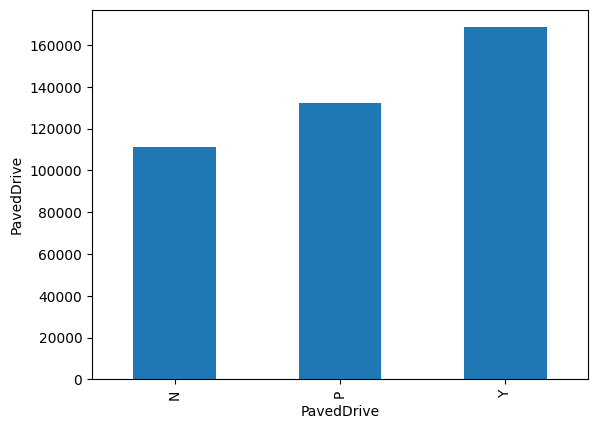

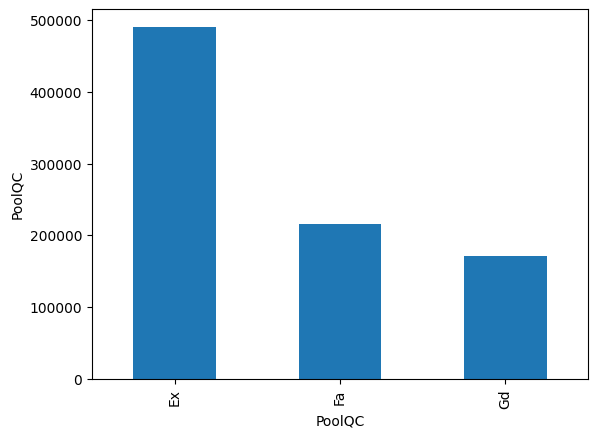

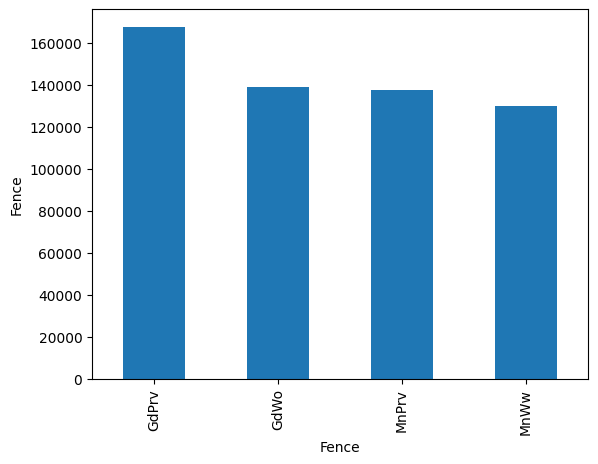

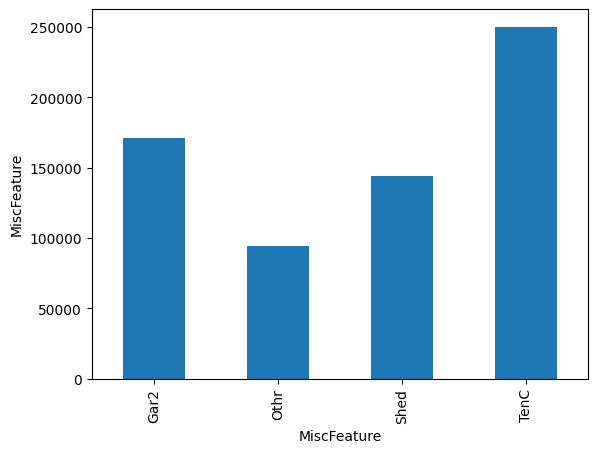

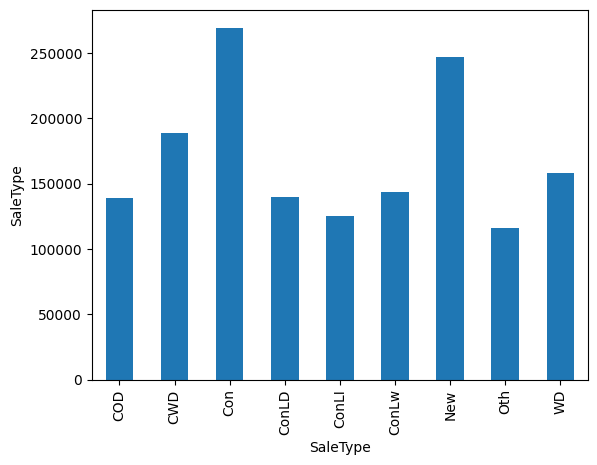

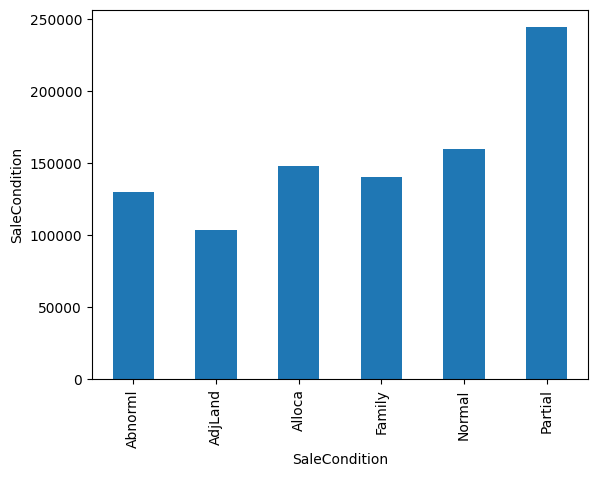

In [145]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel(feature)
    plt.show()

# Feature Engineering

In [146]:
categorical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=="O"]
for feature in categorical_with_nan:
    print("{} : {} %missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley : 0.9377 %missing values
MasVnrType : 0.0055 %missing values
BsmtQual : 0.0253 %missing values
BsmtCond : 0.0253 %missing values
BsmtExposure : 0.026 %missing values
BsmtFinType1 : 0.0253 %missing values
BsmtFinType2 : 0.026 %missing values
Electrical : 0.0007 %missing values
FireplaceQu : 0.4726 %missing values
GarageType : 0.0555 %missing values
GarageFinish : 0.0555 %missing values
GarageQual : 0.0555 %missing values
GarageCond : 0.0555 %missing values
PoolQC : 0.9952 %missing values
Fence : 0.8075 %missing values
MiscFeature : 0.963 %missing values


In [147]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [148]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[categorical_with_nan]=data[categorical_with_nan].fillna("Missing")
    return data

dataset=replace_cat_feature(dataset,categorical_with_nan)
dataset[categorical_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [149]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [150]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!="O"]
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [151]:
len(numerical_with_nan)

3

In [152]:
for feature in numerical_with_nan:
    median_value=dataset[feature].median()
    dataset[feature].fillna(median_value,inplace=True)
    


In [153]:
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [154]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [155]:
num_features=["LotFrontage","LotArea","1stFlrSF","GrLivArea","SalePrice"]

In [156]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [157]:
for feature in categorical_features:
    labels_ordered=dataset.groupby(feature)["SalePrice"].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered)}
    print(labels_ordered)
    dataset[feature]=dataset[feature].map(labels_ordered)

{'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
{'Grvl': 0, 'Pave': 1}
{'Grvl': 0, 'Pave': 1, 'Missing': 2}
{'Reg': 0, 'IR1': 1, 'IR3': 2, 'IR2': 3}
{'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
{'NoSeWa': 0, 'AllPub': 1}
{'Inside': 0, 'FR2': 1, 'Corner': 2, 'FR3': 3, 'CulDSac': 4}
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}
{'Artery': 0, 'RRAe': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRNe': 5, 'RRNn': 6, 'PosN': 7, 'PosA': 8}
{'RRNn': 0, 'Artery': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosN': 6, 'PosA': 7}
{'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}
{'1.5Unf': 0, 'SFoyer': 1, '1.5Fin': 2, '2.5Unf': 3, 'SLvl': 4, '1Story':

In [158]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         0   
1   2          20         3         80.0     9600       1      2         0   
2   3          60         3         68.0    11250       1      2         1   
3   4          70         3         60.0     9550       1      2         1   
4   5          60         3         84.0    14260       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            16           4   
1            1          1          1          0            20           2   
2            1          1          0          0            16           4   
3            1          1          2          0            17           4   
4            1          1          1          0            24           4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         4           6            7            5       2003   
1           4         4           5            6            8       1976   
2           4         4           6            7            5       2001   
3           4         4           6            7            5       1915   
4           4         4           6            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         2           11           12           2   
1          1976          1         2            4            5           1   
2          2002          1         2           11           12           2   
3          1970          1         2            5            8           1   
4          2000          1         2           11           12           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           5         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        5          4           1           5   
1        284         1262        5          4           1           5   
2        434          920        5          4           1           5   
3        540          756        5          3           1           5   
4        490         1145        5          4           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2 

In [159]:
feature_scale=[feature for feature in dataset.columns if feature not in ["Id","SalePrice"]]

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [161]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         0   
1   2          20         3         80.0     9600       1      2         0   
2   3          60         3         68.0    11250       1      2         1   
3   4          70         3         60.0     9550       1      2         1   
4   5          60         3         84.0    14260       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            16           4   
1            1          1          1          0            20           2   
2            1          1          0          0            16           4   
3            1          1          2          0            17           4   
4            1          1          1          0            24           4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         4           6            7            5       2003   
1           4         4           5            6            8       1976   
2           4         4           6            7            5       2001   
3           4         4           6            7            5       1915   
4           4         4           6            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         2           11           12           2   
1          1976          1         2            4            5           1   
2          2002          1         2           11           12           2   
3          1970          1         2            5            8           1   
4          2000          1         2           11           12           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           5         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        5          4           1           5   
1        284         1262        5          4           1           5   
2        434          920        5          4           1           5   
3        540          756        5          3           1           5   
4        490         1145        5          4           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2 

In [207]:
scaler.transform(dataset[feature_scale])

import pickle

pickle.dump(scaler,open("scaling.pkl","wb"))

In [163]:
data=pd.concat([dataset[["Id","SalePrice"]].reset_index(drop=True),
               pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [164]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1     208500    0.235294      0.75     0.150685  0.033420     1.0    1.0   
1   2     181500    0.000000      0.75     0.202055  0.038795     1.0    1.0   
2   3     223500    0.235294      0.75     0.160959  0.046507     1.0    1.0   
3   4     140000    0.294118      0.75     0.133562  0.038561     1.0    1.0   
4   5     250000    0.235294      0.75     0.215753  0.060576     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.666667   
1  0.000000     0.333333        1.0       0.25        0.0      0.833333   
2  0.333333     0.333333        1.0       0.00        0.0      0.666667   
3  0.333333     0.333333        1.0       0.50        0.0      0.708333   
4  0.333333     0.333333        1.0       0.25        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0        0.50    0.571429       1.0    0.857143     0.666667        0.500   
1        0.25    0.571429       1.0    0.714286     0.555556        0.875   
2        0.50    0.571429       1.0    0.857143     0.666667        0.500   
3        0.50    0.571429       1.0    0.857143     0.666667        0.500   
4        0.50    0.571429       1.0    0.857143     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.949275      0.883333        0.2  0.285714     0.785714     0.800000   
1   0.753623      0.433333        0.2  0.285714     0.285714     0.333333   
2   0.934783      0.866667        0.2  0.285714     0.785714     0.800000   
3   0.311594      0.333333        0.2  0.285714     0.357143     0.533333   
4   0.927536      0.833333        0.2  0.285714     0.785714     0.800000   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667       0.75         1.0      0.75   
1        0.25     0.00000   0.333333       0.75         0.4      0.75   
2        0.50     0.10125   0.666667       0.75         1.0      0.75   
3        0.25     0.00000   0.333333       0.75         0.2      0.50   
4        0.50     0.21875   0.666667       0.75         1.0      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.119780  0.413559           0.0   0.259231      0.333333           0.0   
1  0.212942  0.000000           0.0   0.174830      0.000000           0.5   
2  0.134465  0.419370           0.0   0.273549      0.333333           0.0   
3  0.143873  0.366102           0.0   0.260550      0.333333           0.0   
4  0.186095  0.509927           0.0   0.351168      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [165]:
import pickle

pickle.dump(scaler,open("scaling.pkl","wb"))

In [166]:
data.corr()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage  \
Id             1.000000  -0.021917    0.011156  0.029329    -0.009921   
SalePrice     -0.021917   1.000000   -0.084284  0.324610     0.334771   
MSSubClass     0.011156  -0.084284    1.000000 -0.211535    -0.356718   
MSZoning       0.029329   0.324610   -0.211535  1.000000     0.256042   
LotFrontage   -0.009921   0.334771   -0.356718  0.256042     1.000000   
...                 ...        ...         ...       ...          ...   
MiscVal       -0.006242  -0.021190   -0.007683  0.000786    -0.000255   
MoSold         0.021172   0.046432   -0.013585 -0.004702     0.010451   
YrSold         0.000712  -0.028923   -0.021407  0.010486     0.006380   
SaleType      -0.022512   0.366821   -0.048041  0.172691     0.121422   
SaleCondition -0.004700   0.238111   -0.027544  0.121091     0.065000   

                LotArea    Street     Alley  LotShape  LandContour  Utilities  \
Id            -0.033226  0.008916 -0.001530 -0.036312     0.003741  -0.013324   
SalePrice      0.263843  0.041036  0.139868  0.265699     0.158437   0.014314   
MSSubClass    -0.139781 -0.024969 -0.105995 -0.103700    -0.027856   0.022844   
MSZoning       0.140859  0.084606  0.221947  0.187166     0.045657  -0.009400   
LotFrontage    0.304522 -0.037349  0.132003  0.155352     0.048683   0.001027   
...                 ...       ...       ...       ...          ...        ...   
MiscVal        0.038068 -0.022733  0.001162  0.024726     0.000096   0.002296   
MoSold         0.001205  0.003690  0.013094  0.024876     0.084236   0.051552   
YrSold        -0.014261 -0.025043  0.020944 -0.028792    -0.016689  -0.023353   
SaleType       0.023564  0.042360  0.016168  0.042979     0.078428   0.028270   
SaleCondition  0.037166 -0.000132  0.045481  0.048021     0.058891   0.083578   

               LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
Id             -0.034527   0.005847      0.000058    0.000372    0.050172   
SalePrice       0.122882   0.051152      0.696882    0.172398    0.093693   
MSSubClass     -0.070857  -0.025672     -0.055582   -0.011989   -0.036884   
MSZoning        0.079673   0.006208      0.542873    0.135420    0.077112   
LotFrontage     0.090743   0.065603      0.233742    0.030101    0.036949   
...                  ...        ...           ...         ...         ...   
MiscVal         0.049381  -0.003518     -0.038071   -0.028314    0.043430   
MoSold         -0.018237   0.007072      0.054886    0.043784    0.016204   
YrSold          0.005308  -0.002305     -0.028672    0.013626   -0.025587   
SaleType       -0.026608  -0.047691      0.316106    0.050878    0.062609   
SaleCondition  -0.040893  -0.046610      0.205762    0.076487    0.048404   

               BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id            -0.007664   -0.014425    -0.028365     0.012609  -0.012713   
SalePrice      0.176025    0.273075     0.790982    -0.077856   0.522897   
MSSubClass    -0.718182    0.002035     0.032628    -0.059316   0.027850   
MSZoning       0.159184    0.227160     0.269302    -0.146350   0.461917   
LotFrontage    0.229032    0.115509     0.234812    -0.053281   0.116685   
...                 ...         ...          ...          ...        ...   
MiscVal       -0.038522   -0.032682    -0.031406     0.068777  -0.034383   
MoSold         0.024765    0.010250     0.070815    -0.003511   0.012398   
YrSold         0.005107   -0.003833    -0.027347     0.043950  -0.013618   
SaleType       0.078198    0.128603     0.338998    -0.117919   0.342256   
SaleCondition  0.059038    0.084259     0.211938     0.010784   0.224256   

               YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
Id                -0.021998   0.043882 -0.041767    -0.008711    -0.009013   
SalePrice          0.507101   0.239777  0.156743     0.371400     0.365384   
MSSubClass         0.040581  -0.137128 -0.038201    -0.009410    -0.022945   
MSZoning           0.

<AxesSubplot:>

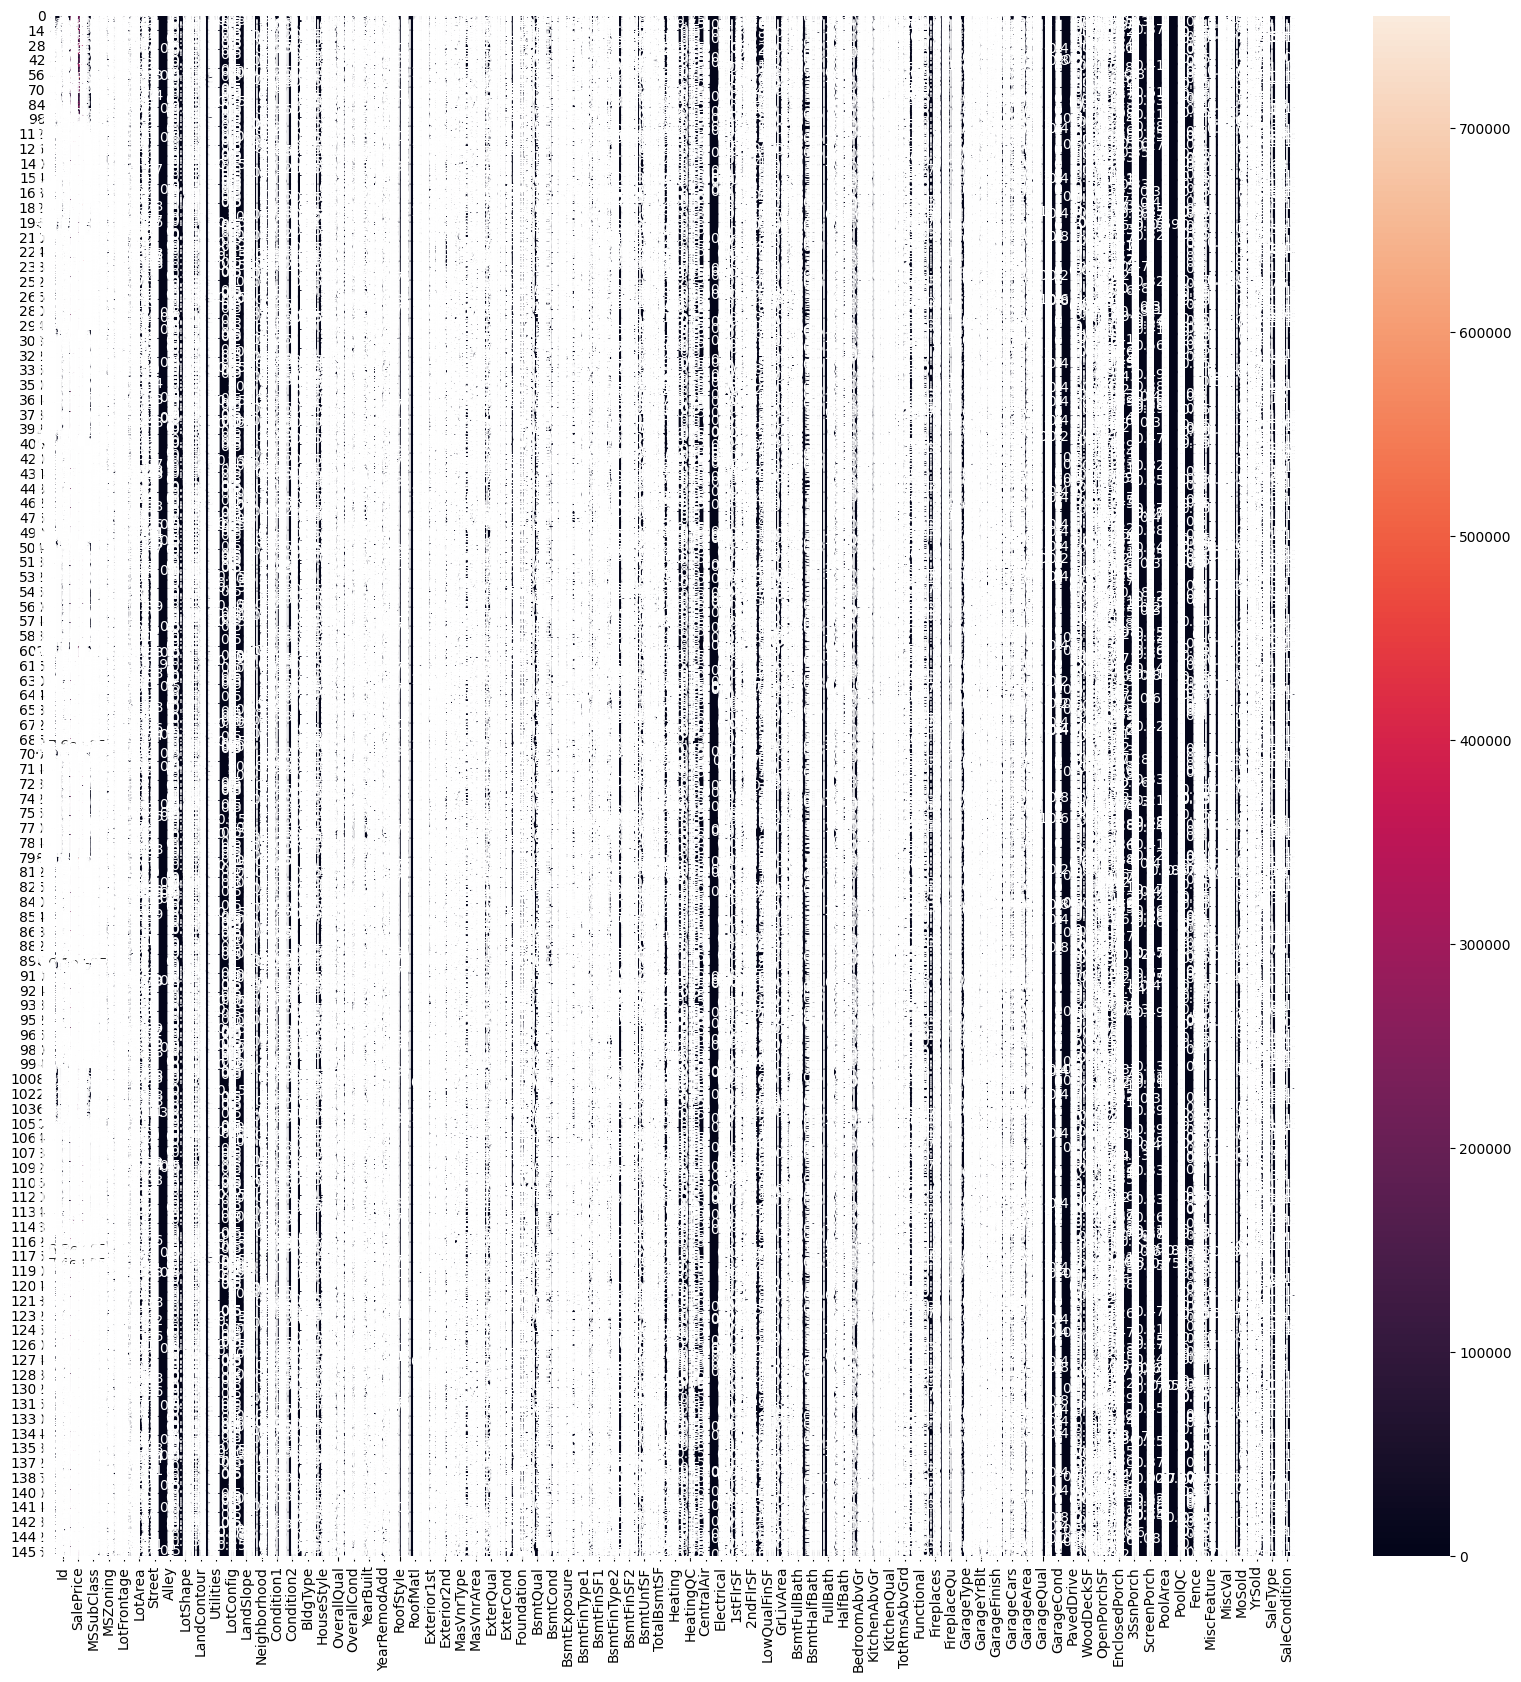

In [167]:
plt.figure(figsize=(20,20))
import seaborn as sns
sns.heatmap(data,annot=True)

In [168]:
x=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']

In [169]:
x

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0        1    0.235294      0.75     0.150685  0.033420     1.0    1.0   
1        2    0.000000      0.75     0.202055  0.038795     1.0    1.0   
2        3    0.235294      0.75     0.160959  0.046507     1.0    1.0   
3        4    0.294118      0.75     0.133562  0.038561     1.0    1.0   
4        5    0.235294      0.75     0.215753  0.060576     1.0    1.0   
...    ...         ...       ...          ...       ...     ...    ...   
1455  1456    0.235294      0.75     0.140411  0.030929     1.0    1.0   
1456  1457    0.000000      0.75     0.219178  0.055505     1.0    1.0   
1457  1458    0.294118      0.75     0.154110  0.036187     1.0    1.0   
1458  1459    0.000000      0.75     0.160959  0.039342     1.0    1.0   
1459  1460    0.000000      0.75     0.184932  0.040370     1.0    1.0   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0     0.000000     0.333333        1.0       0.00        0.0      0.666667   
1     0.000000     0.333333        1.0       0.25        0.0      0.833333   
2     0.333333     0.333333        1.0       0.00        0.0      0.666667   
3     0.333333     0.333333        1.0       0.50        0.0      0.708333   
4     0.333333     0.333333        1.0       0.25        0.0      1.000000   
...        ...          ...        ...        ...        ...           ...   
1455  0.000000     0.333333        1.0       0.00        0.0      0.583333   
1456  0.000000     0.333333        1.0       0.00        0.0      0.541667   
1457  0.000000     0.333333        1.0       0.00        0.0      0.708333   
1458  0.000000     0.333333        1.0       0.00        0.0      0.416667   
1459  0.000000     0.333333        1.0       0.00        0.0      0.166667   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0           0.50    0.571429       1.0    0.857143     0.666667        0.500   
1           0.25    0.571429       1.0    0.714286     0.555556        0.875   
2           0.50    0.571429       1.0    0.857143     0.666667        0.500   
3           0.50    0.571429       1.0    0.857143     0.666667        0.500   
4           0.50    0.571429       1.0    0.857143     0.777778        0.500   
...          ...         ...       ...         ...          ...          ...   
1455        0.50    0.571429       1.0    0.857143     0.555556        0.500   
1456        0.50    0.571429       1.0    0.714286     0.555556        0.625   
1457        0.50    0.571429       1.0    0.857143     0.666667        1.000   
1458        0.50    0.571429       1.0    0.714286     0.444444        0.625   
1459        0.50    0.571429       1.0    0.714286     0.444444        0.625   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0      0.949275      0.883333        0.2  0.285714     0.785714     0.800000   
1      0.753623      0.433333        0.2  0.285714     0.285714     0.333333   
2      0.934783      0.866667        0.2  0.285714     0.785714     0.800000   
3      0.311594      0.333333        0.2  0.285714     0.357143     0.533333   
4      0.927536      0.833333        0.2  0.285714     0.785714     0.800000   
...         ...           ...        ...       ...          ...          ...   
1455   0.920290      0.833333        0.2  0.285714     0.785714     0.800000   
1456   0.768116      0.633333        0.2  0.285714     0.642857     0.666667   
1457   0.500000      0.933333        0.2  0.285714     0.857143     0.866667   
1458   0.565217      0.766667        0.8  0.285714     0.285714     0.333333   
1459   0.673913      0.250000        0.2  0.285714     0.571429     0.600000   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           0.50    0.122500   0.666667       0.75         1.0      0.75   
1           0.25    0.000000   0.333333       0.75         0.4      0.75   
2           0.50    0.101250   0

In [170]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [171]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [172]:
model.feature_importances_

array([3.12062658e-03, 2.95039102e-03, 3.71599167e-03, 2.94533372e-03,
       7.27237872e-03, 8.83846987e-05, 8.19635326e-04, 2.59506336e-03,
       2.86106274e-03, 2.02954830e-06, 2.20364948e-03, 2.31614745e-03,
       1.04419658e-01, 1.82447768e-03, 4.33527456e-04, 1.46571695e-03,
       1.90996165e-03, 1.90818507e-01, 4.18967543e-03, 7.64114336e-03,
       6.53526632e-03, 2.34265602e-03, 8.21951607e-04, 2.41593897e-03,
       1.96087183e-03, 2.19865982e-03, 4.37941030e-03, 1.00485439e-01,
       1.33676474e-03, 1.56170102e-03, 4.88941913e-02, 1.07066779e-03,
       4.57234484e-03, 1.79540120e-03, 1.56526007e-02, 8.00930895e-04,
       1.15556534e-03, 2.60195002e-03, 1.93663093e-02, 3.86035456e-04,
       1.44361058e-03, 5.94011229e-03, 3.74325688e-04, 1.87373296e-02,
       1.36020210e-02, 4.16230753e-04, 7.59760187e-02, 5.69539292e-03,
       1.02731424e-03, 2.63635343e-02, 3.05994461e-03, 5.31580681e-03,
       5.46329322e-04, 6.94717308e-02, 9.67371866e-03, 1.11060169e-03,
      

In [173]:
len(model.feature_importances_)

80

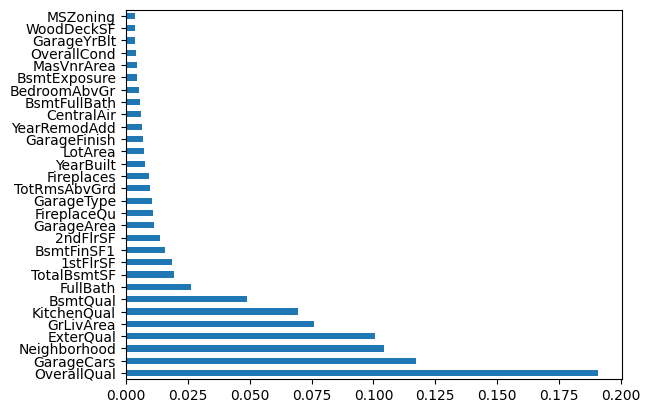

In [174]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [175]:
feat_importances.nlargest(30)

OverallQual     0.190819
GarageCars      0.117212
Neighborhood    0.104420
ExterQual       0.100485
GrLivArea       0.075976
KitchenQual     0.069472
BsmtQual        0.048894
FullBath        0.026364
TotalBsmtSF     0.019366
1stFlrSF        0.018737
BsmtFinSF1      0.015653
2ndFlrSF        0.013602
GarageArea      0.011201
FireplaceQu     0.010994
GarageType      0.010705
TotRmsAbvGrd    0.009674
Fireplaces      0.009226
YearBuilt       0.007641
LotArea         0.007272
GarageFinish    0.006955
YearRemodAdd    0.006535
CentralAir      0.005940
BsmtFullBath    0.005695
BedroomAbvGr    0.005316
BsmtExposure    0.004572
MasVnrArea      0.004379
OverallCond     0.004190
GarageYrBlt     0.003888
WoodDeckSF      0.003779
MSZoning        0.003716
dtype: float64

In [176]:
for i in range(30):
    r=feat_importances.nlargest(30).index[i]
    print(r)

OverallQual
GarageCars
Neighborhood
ExterQual
GrLivArea
KitchenQual
BsmtQual
FullBath
TotalBsmtSF
1stFlrSF
BsmtFinSF1
2ndFlrSF
GarageArea
FireplaceQu
GarageType
TotRmsAbvGrd
Fireplaces
YearBuilt
LotArea
GarageFinish
YearRemodAdd
CentralAir
BsmtFullBath
BedroomAbvGr
BsmtExposure
MasVnrArea
OverallCond
GarageYrBlt
WoodDeckSF
MSZoning


In [177]:
df=data[['OverallQual',
'GarageCars',
'ExterQual',
'Neighborhood',
'GrLivArea',
'KitchenQual',
'BsmtQual',
'FullBath',
'1stFlrSF',
'TotalBsmtSF',
'2ndFlrSF',
'FireplaceQu',
'BsmtFinSF1',
'YearBuilt',
'GarageArea',
'GarageType',
'Fireplaces',
'TotRmsAbvGrd',
'YearRemodAdd',
'BedroomAbvGr',
'GarageYrBlt',
'GarageFinish',
'LotArea',
'CentralAir',
'BsmtFullBath',
'MasVnrArea',
'BsmtExposure',
'OverallCond',
'WoodDeckSF',
'MSZoning',
"SalePrice"
]]

In [178]:
df.head()

OverallQual  GarageCars  ExterQual  Neighborhood  GrLivArea  KitchenQual  \
0     0.666667        0.50   0.666667      0.666667   0.259231     0.666667   
1     0.555556        0.50   0.333333      0.833333   0.174830     0.333333   
2     0.666667        0.50   0.666667      0.666667   0.273549     0.666667   
3     0.666667        0.75   0.333333      0.708333   0.260550     0.666667   
4     0.777778        0.75   0.666667      1.000000   0.351168     0.666667   

   BsmtQual  FullBath  1stFlrSF  TotalBsmtSF  2ndFlrSF  FireplaceQu  \
0      0.75  0.666667  0.119780     0.140098  0.413559          0.2   
1      0.75  0.666667  0.212942     0.206547  0.000000          0.6   
2      0.75  0.666667  0.134465     0.150573  0.419370          0.6   
3      0.50  0.333333  0.143873     0.123732  0.366102          0.8   
4      0.75  0.666667  0.186095     0.187398  0.509927          0.6   

   BsmtFinSF1  YearBuilt  GarageArea  GarageType  Fireplaces  TotRmsAbvGrd  \
0    0.125089   0.949275    0.386460    0.833333    0.000000      0.500000   
1    0.173281   0.753623    0.324401    0.833333    0.333333      0.333333   
2    0.086109   0.934783    0.428773    0.833333    0.333333      0.333333   
3    0.038271   0.311594    0.452750    0.333333    0.333333      0.416667   
4    0.116052   0.927536    0.589563    0.833333    0.333333      0.583333   

   YearRemodAdd  BedroomAbvGr  GarageYrBlt  GarageFinish   LotArea  \
0      0.883333         0.375     0.936364      0.666667  0.033420   
1      0.433333         0.375     0.690909      0.666667  0.038795   
2      0.866667         0.375     0.918182      0.666667  0.046507   
3      0.333333         0.375     0.890909      0.333333  0.038561   
4      0.833333         0.500     0.909091      0.666667  0.060576   

   CentralAir  BsmtFullBath  MasVnrArea  BsmtExposure  OverallCond  \
0         1.0      0.333333     0.12250          0.25        0.500   
1         1.0      0.000000     0.00000          1.00        0.875   
2         1.0      0.333333     0.10125          0.50        0.500   
3         1.0      0.333333     0.00000          0.25        0.500   
4         1.0      0.333333     0.21875          0.75        0.500   

   WoodDeckSF  MSZoning  SalePrice  
0    0.000000      0.75     208500  
1    0.347725      0.75     181500  
2    0.000000      0.75     223500  
3    0.000000      0.75     140000  
4    0.224037      0.75     250000

In [179]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [180]:
x.head()

OverallQual  GarageCars  ExterQual  Neighborhood  GrLivArea  KitchenQual  \
0     0.666667        0.50   0.666667      0.666667   0.259231     0.666667   
1     0.555556        0.50   0.333333      0.833333   0.174830     0.333333   
2     0.666667        0.50   0.666667      0.666667   0.273549     0.666667   
3     0.666667        0.75   0.333333      0.708333   0.260550     0.666667   
4     0.777778        0.75   0.666667      1.000000   0.351168     0.666667   

   BsmtQual  FullBath  1stFlrSF  TotalBsmtSF  2ndFlrSF  FireplaceQu  \
0      0.75  0.666667  0.119780     0.140098  0.413559          0.2   
1      0.75  0.666667  0.212942     0.206547  0.000000          0.6   
2      0.75  0.666667  0.134465     0.150573  0.419370          0.6   
3      0.50  0.333333  0.143873     0.123732  0.366102          0.8   
4      0.75  0.666667  0.186095     0.187398  0.509927          0.6   

   BsmtFinSF1  YearBuilt  GarageArea  GarageType  Fireplaces  TotRmsAbvGrd  \
0    0.125089   0.949275    0.386460    0.833333    0.000000      0.500000   
1    0.173281   0.753623    0.324401    0.833333    0.333333      0.333333   
2    0.086109   0.934783    0.428773    0.833333    0.333333      0.333333   
3    0.038271   0.311594    0.452750    0.333333    0.333333      0.416667   
4    0.116052   0.927536    0.589563    0.833333    0.333333      0.583333   

   YearRemodAdd  BedroomAbvGr  GarageYrBlt  GarageFinish   LotArea  \
0      0.883333         0.375     0.936364      0.666667  0.033420   
1      0.433333         0.375     0.690909      0.666667  0.038795   
2      0.866667         0.375     0.918182      0.666667  0.046507   
3      0.333333         0.375     0.890909      0.333333  0.038561   
4      0.833333         0.500     0.909091      0.666667  0.060576   

   CentralAir  BsmtFullBath  MasVnrArea  BsmtExposure  OverallCond  \
0         1.0      0.333333     0.12250          0.25        0.500   
1         1.0      0.000000     0.00000          1.00        0.875   
2         1.0      0.333333     0.10125          0.50        0.500   
3         1.0      0.333333     0.00000          0.25        0.500   
4         1.0      0.333333     0.21875          0.75        0.500   

   WoodDeckSF  MSZoning  
0    0.000000      0.75  
1    0.347725      0.75  
2    0.000000      0.75  
3    0.000000      0.75  
4    0.224037      0.75

In [181]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [183]:
x_train

OverallQual  GarageCars  ExterQual  Neighborhood  GrLivArea  \
64       0.666667        0.50   0.333333      0.666667   0.320271   
682      0.555556        0.50   0.333333      0.750000   0.180294   
960      0.444444        0.00   0.333333      0.125000   0.098719   
1384     0.555556        0.25   0.333333      0.166667   0.174077   
1100     0.111111        0.25   0.333333      0.333333   0.019593   
...           ...         ...        ...           ...        ...   
763      0.777778        0.75   0.666667      1.000000   0.382630   
835      0.333333        0.50   0.333333      0.250000   0.138093   
1216     0.555556        0.50   0.333333      0.250000   0.295403   
559      0.666667        0.50   0.666667      0.625000   0.230407   
684      0.666667        0.50   0.666667      1.000000   0.283534   

      KitchenQual  BsmtQual  FullBath  1stFlrSF  TotalBsmtSF  2ndFlrSF  \
64       0.666667      0.75  0.666667  0.165902     0.172995  0.473123   
682      0.666667      0.75  0.333333  0.219596     0.211293  0.000000   
960      0.333333      0.50  0.333333  0.120239     0.140426  0.000000   
1384     0.333333      0.50  0.333333  0.083525     0.091653  0.271186   
1100     0.000000      0.50  0.333333  0.023864     0.047463  0.000000   
...           ...       ...       ...       ...          ...       ...   
763      0.666667      0.75  0.666667  0.214318     0.204910  0.531235   
835      0.666667      0.75  0.666667  0.168196     0.174632  0.000000   
1216     0.333333      0.00  0.666667  0.225792     0.000000  0.282809   
559      0.666667      0.75  0.666667  0.280633     0.224877  0.000000   
684      0.333333      0.75  0.666667  0.197568     0.195581  0.311864   

      FireplaceQu  BsmtFinSF1  YearBuilt  GarageArea  GarageType  Fireplaces  \
64            0.2    0.130936   0.905797    0.454866    0.833333    0.000000   
682           0.8    0.177711   0.898551    0.303949    0.833333    0.333333   
960           0.2    0.123317   0.623188    0.000000    0.000000    0.000000   
1384          0.2    0.036145   0.485507    0.197461    0.333333    0.000000   
1100          0.2    0.051382   0.347826    0.173484    0.333333    0.000000   
...           ...         ...        ...         ...         ...         ...   
763           0.8    0.206060   0.920290    0.603667    0.833333    0.333333   
835           0.2    0.078313   0.565217    0.307475    0.833333    0.000000   
1216          0.2    0.000000   0.768116    0.380113    0.833333    0.000000   
559           0.6    0.000000   0.949275    0.296192    0.833333    0.333333   
684           0.2    0.000000   0.913043    0.342736    0.833333    0.000000   

      TotRmsAbvGrd  YearRemodAdd  BedroomAbvGr  GarageYrBlt  GarageFinish  \
64        0.500000      0.800000         0.375     0.890909      0.666667   
682       0.333333      0.783333         0.250     0.872727      0.333333   
960       0.166667      0.966667         0.250     0.727273      0.000000   
1384      0.333333      0.000000         0.250     0.354545      0.333333   
1100      0.083333      0.000000         0.125     0.272727      0.333333   
...            ...           ...           ...          ...           ...   
763       0.500000      0.816667         0.375     0.900000      0.666667   
835       0.166667      0.750000         0.250     0.872727      0.333333   
1216      0.500000      0.466667         0.500     0.709091      0.333333   
559       0.416667      0.900000         0.250     0.936364      1.000000   
684       0.416667      0.800000         0.500     0.890909      1.000000   

       LotArea  CentralAir  BsmtFullBath  MasVnrArea  BsmtExposure  \
64    0.037743         1.0      0.333333    0.358125          0.25   
682   0.007418         1.0      0.333333    0.000000          0.50   
960   0.027610         1.0      0.333333    0.000000          1.00   
1384  0.036271         1.0      0.000000    0.000000          0.50   
1100  0.033186         0.0      0.000000    0.000000

In [184]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
model1=reg.fit(x_train,y_train)

In [185]:
y_pred=model1.predict(x_test)

In [186]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.877014065228647

In [187]:
from xgboost import XGBRegressor
xg=XGBRegressor()
model2=xg.fit(x_train,y_train)

In [188]:
y_pred2=model2.predict(x_test)

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.8948173000366613

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [192]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [193]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [194]:
raju143=rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [195]:
raju143.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [196]:
raju143.best_score_

-758555352.3496022

In [197]:
predictions=raju143.predict(x_test)

In [198]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8805523031146733

In [199]:
raju143.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [200]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 25)
model3=reg.fit(x_train,y_train)

In [201]:
y_pred3=model3.predict(x_test)

In [202]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.8812734469221161

In [203]:
import pickle    

pickle.dump(reg,open('reg.pkl','wb'))